In [143]:
import numpy as np
import pandas as pd
import os
import sys
import shutil

from IPython.display import display
from scipy.cluster import hierarchy as hac

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

import seaborn as sns
sns.set(style="darkgrid")

In [144]:
''' LOAD INFORMATION'''
input_csv = '../../data/fermi_4FGL_associations_ext_GRPHorder+data.csv'
data_in = pd.read_csv(input_csv)
data_in.drop(columns='Unnamed: 0', inplace=True)
DROP_COLUMNS = ['flux', 'flux_err', 'flux_E', 'flux_E_err', 'redshift_flag', 'median_optical_flux', 'num_optical_flux', 'PL_index', 
                'PL_index_err', 'variability_index', 'frac_variability', 'frac_variability_err',]
data_in.drop(columns=DROP_COLUMNS, inplace=True)
data_in = data_in.iloc[:763]
display(data_in.iloc[22])

## combine source_types for simplicity
dict_st = {'FSRQ':'FSRQ', 'fsrq':'FSRQ', 'BCU':'BCU', 'bcu':'BCU', 'BLL':'BLL', 'bll':'BLL'}
data_in['SOURCE_TYPE'] = data_in['source_type'].map(dict_st)

obj_analyze = np.loadtxt('objects_to_analyze_reduced.dat').astype(np.int)
num_analyze = len(obj_analyze)
print('Total number of objects: '+str(num_analyze))

cluster_file = 'hac_corr_cc_complete_10clusters_v10.dat'
clusters = np.loadtxt(cluster_file).astype(np.int)
num_clusters = clusters.max()
print('Total number of clusters: '+str(num_clusters))

## Add cluster number column
data_in['cluster'] = -1
data_in['cluster'].iloc[obj_analyze] = clusters
data_in = data_in.loc[data_in['cluster']>-1]

name_4FGL                 4FGL J1427.0+2348
alt_name_gamma            3FGL J1427.0+2347
source_type                             BLL
associated_source              PKS 1424+240
associated_ra                       216.752
                                ...        
cross_corr_t0_lerr                0.0602443
cross_corr_t0_uerr                0.0567263
cross_corr_sig_t0                  0.790154
cross_corr_sig_t0_lerr             0.417675
cross_corr_sig_t0_uerr             0.319691
Name: 22, Length: 125, dtype: object

Total number of objects: 549
Total number of clusters: 9


C:\Users\psyko\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [145]:
''' COPY INDIVIDUAL OBJECT PLOTS INTO CLUSTER FOLDERS'''
cluster_prefix = './individual_cluster_plots/individuals_in_clusters/cluster'
for ii in range(0,num_clusters):
	cluster_dir = cluster_prefix+str(ii+1).zfill(2)
	if not os.path.isdir(cluster_dir):
		os.mkdir(cluster_dir)

plot_all_dir = '../../analysis/full_all_v1/'
for ii in range(0,num_analyze):
	obj_num = obj_analyze[ii]
	plot_file = plot_all_dir+'plot_all_object'+str(obj_num).zfill(4)+'_00.png'
	shutil.copy(plot_file, cluster_prefix+str(clusters[ii]).zfill(2))


In [146]:
display(data_in.iloc[22])
display(data_in.head(5))
display(data_in.columns.tolist())

name_4FGL                 4FGL J0217.8+0144
alt_name_gamma            3FGL J0217.8+0143
source_type                            fsrq
associated_source              PKS 0215+015
associated_ra                        34.454
                                ...        
cross_corr_sig_t0                    3.2298
cross_corr_sig_t0_lerr             0.442647
cross_corr_sig_t0_uerr             0.412328
SOURCE_TYPE                            FSRQ
cluster                                   0
Name: 140, Length: 127, dtype: object

,name_4FGL,alt_name_gamma,source_type,associated_source,associated_ra,associated_de,redshift,TeVCat_Flag,opt_flux_median_opt-t,opt_flux_err_median_opt-t,...,timescale_gam_lerr,timescale_gam_uerr,cross_corr_t0,cross_corr_t0_lerr,cross_corr_t0_uerr,cross_corr_sig_t0,cross_corr_sig_t0_lerr,cross_corr_sig_t0_uerr,SOURCE_TYPE,cluster
8,4FGL J0457.0-2324,3FGL J0457.0-2324,FSRQ,PKS 0454-234,74.263247,-23.414450,1.003000,N,0.219673,0.072211,...,1.641537,1.636409,0.529798,0.041963,0.038982,3.901298,0.356137,0.330842,FSRQ,1
12,4FGL J1504.4+1029,3FGL J1504.4+1029,FSRQ,PKS 1502+106,226.104082,10.494222,1.838306,N,0.213815,0.065210,...,9.292762,10.131004,0.417135,0.048877,0.047405,2.417283,0.253144,0.245521,FSRQ,2
13,4FGL J2232.6+1143,3FGL J2232.5+1143,FSRQ,CTA 102,338.151704,11.730807,1.037000,N,0.362069,0.097027,...,4.697334,5.076938,0.441944,0.053466,0.049975,2.310954,0.210048,0.196331,FSRQ,5
14,4FGL J0222.6+4302,3FGL J0222.6+4301,BLL,3C 66A,35.665048,43.035500,0.444000,P,2.778408,0.142275,...,6.334988,6.710492,0.353566,0.059850,0.055962,2.399340,0.501848,0.491403,BLL,9
23,4FGL J1653.8+3945,3FGL J1653.9+3945,BLL,Mkn 501,253.467570,39.760169,0.033663,P,11.407750,0.280453,...,12.800200,12.611625,0.562612,0.036347,0.037749,2.819961,0.266393,0.276671,BLL,0


['name_4FGL',
 'alt_name_gamma',
 'source_type',
 'associated_source',
 'associated_ra',
 'associated_de',
 'redshift',
 'TeVCat_Flag',
 'opt_flux_median_opt-t',
 'opt_flux_err_median_opt-t',
 'opt_variance_opt-t',
 'gam_flux_median_opt-t',
 'gam_flux_errd_median_opt-t',
 'gam_flux_erru_median_opt-t',
 'gam_variance_opt-t',
 'ratio_median_opt-t',
 'ratio_errd_median_opt-t',
 'ratio_erru_median_opt-t',
 'ratio_variance_opt-t',
 'b_median_opt-t',
 'b_errd_median_opt-t',
 'b_erru_median_opt-t',
 'b_variance_opt-t',
 'bl_median_opt-t',
 'bl_errd_median_opt-t',
 'bl_erru_median_opt-t',
 'bl_variance_opt-t',
 'bu_median_opt-t',
 'bu_errd_median_opt-t',
 'bu_erru_median_opt-t',
 'bu_variance_opt-t',
 'k_median_opt-t',
 'k_errd_median_opt-t',
 'k_erru_median_opt-t',
 'k_variance_opt-t',
 'corr_opt_ratio',
 'corr_opt_ratio_std',
 'corr_gam_ratio',
 'corr_gam_ratio_std',
 'corr_b_bl',
 'corr_b_bl_std',
 'corr_b_bu',
 'corr_b_bu_std',
 'corr_b_k',
 'corr_b_k_std',
 'corr_bl_bu',
 'corr_bl_bu_std'

SOURCE_TYPE,BCU,BLL,FSRQ
cluster,,,
0,2.0,12.0,9.0
1,1.0,7.0,5.0
2,1.0,8.0,4.0
3,NaN,10.0,3.0
4,1.0,8.0,3.0
5,1.0,5.0,5.0
6,1.0,8.0,2.0
7,3.0,5.0,2.0
8,1.0,6.0,3.0


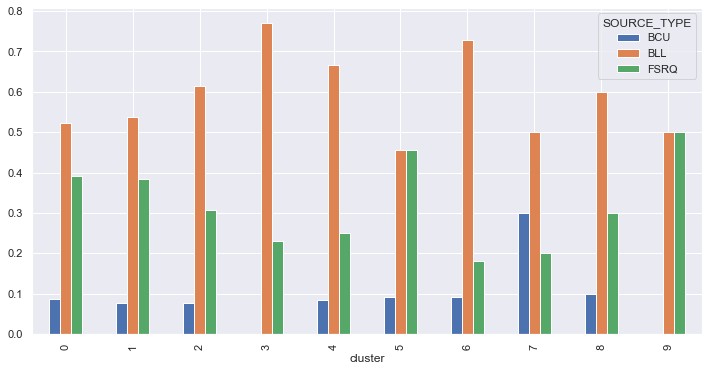

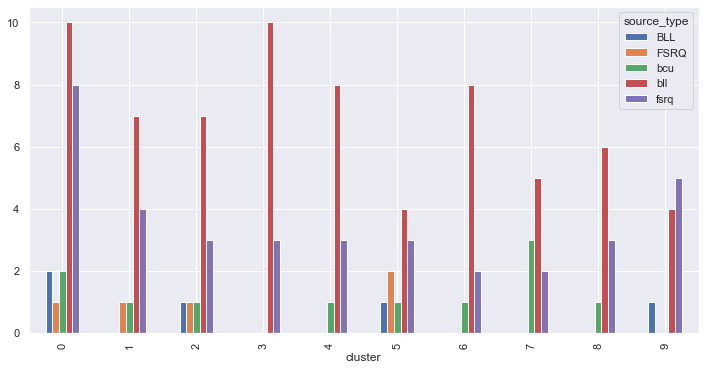

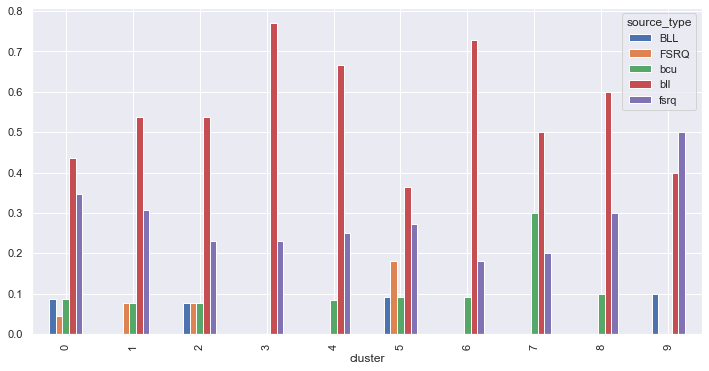

In [147]:
''' FIND RATIOS OF SOURCE TYPE FOR EACH CLUSTER '''
df = data_in[['SOURCE_TYPE', 'cluster']].copy()
df['one'] = 1
blah = df.groupby(['cluster', 'SOURCE_TYPE'])['one'].sum().unstack()
display(blah)
blah_tot = blah.sum(axis=1)
for ii in blah.columns:
	blah[ii] = blah[ii]/blah_tot

# plt.figure(figsize=(10,6))
blah.plot(kind='bar', figsize=(12,6))
plt.savefig('cluster_source_type.png', dpi=400)
# plt.show()
# sns.catplot(x='cluster', y='one', hue='SOURCE_TYPE', data=blah)


df = data_in[['source_type', 'cluster']].copy()
df['one'] = 1
blah = df.groupby(['cluster', 'source_type'])['one'].sum().unstack()
blah.plot(kind='bar', figsize=(12,6))
plt.savefig('cluster_source_type_specific_counts.png', dpi=400)

blah_tot = blah.sum(axis=1)
for ii in blah.columns:
	blah[ii] = blah[ii]/blah_tot

# plt.figure(figsize=(10,6))
blah.plot(kind='bar', figsize=(12,6))
plt.savefig('cluster_source_type_specific.png', dpi=400)
# plt.show()



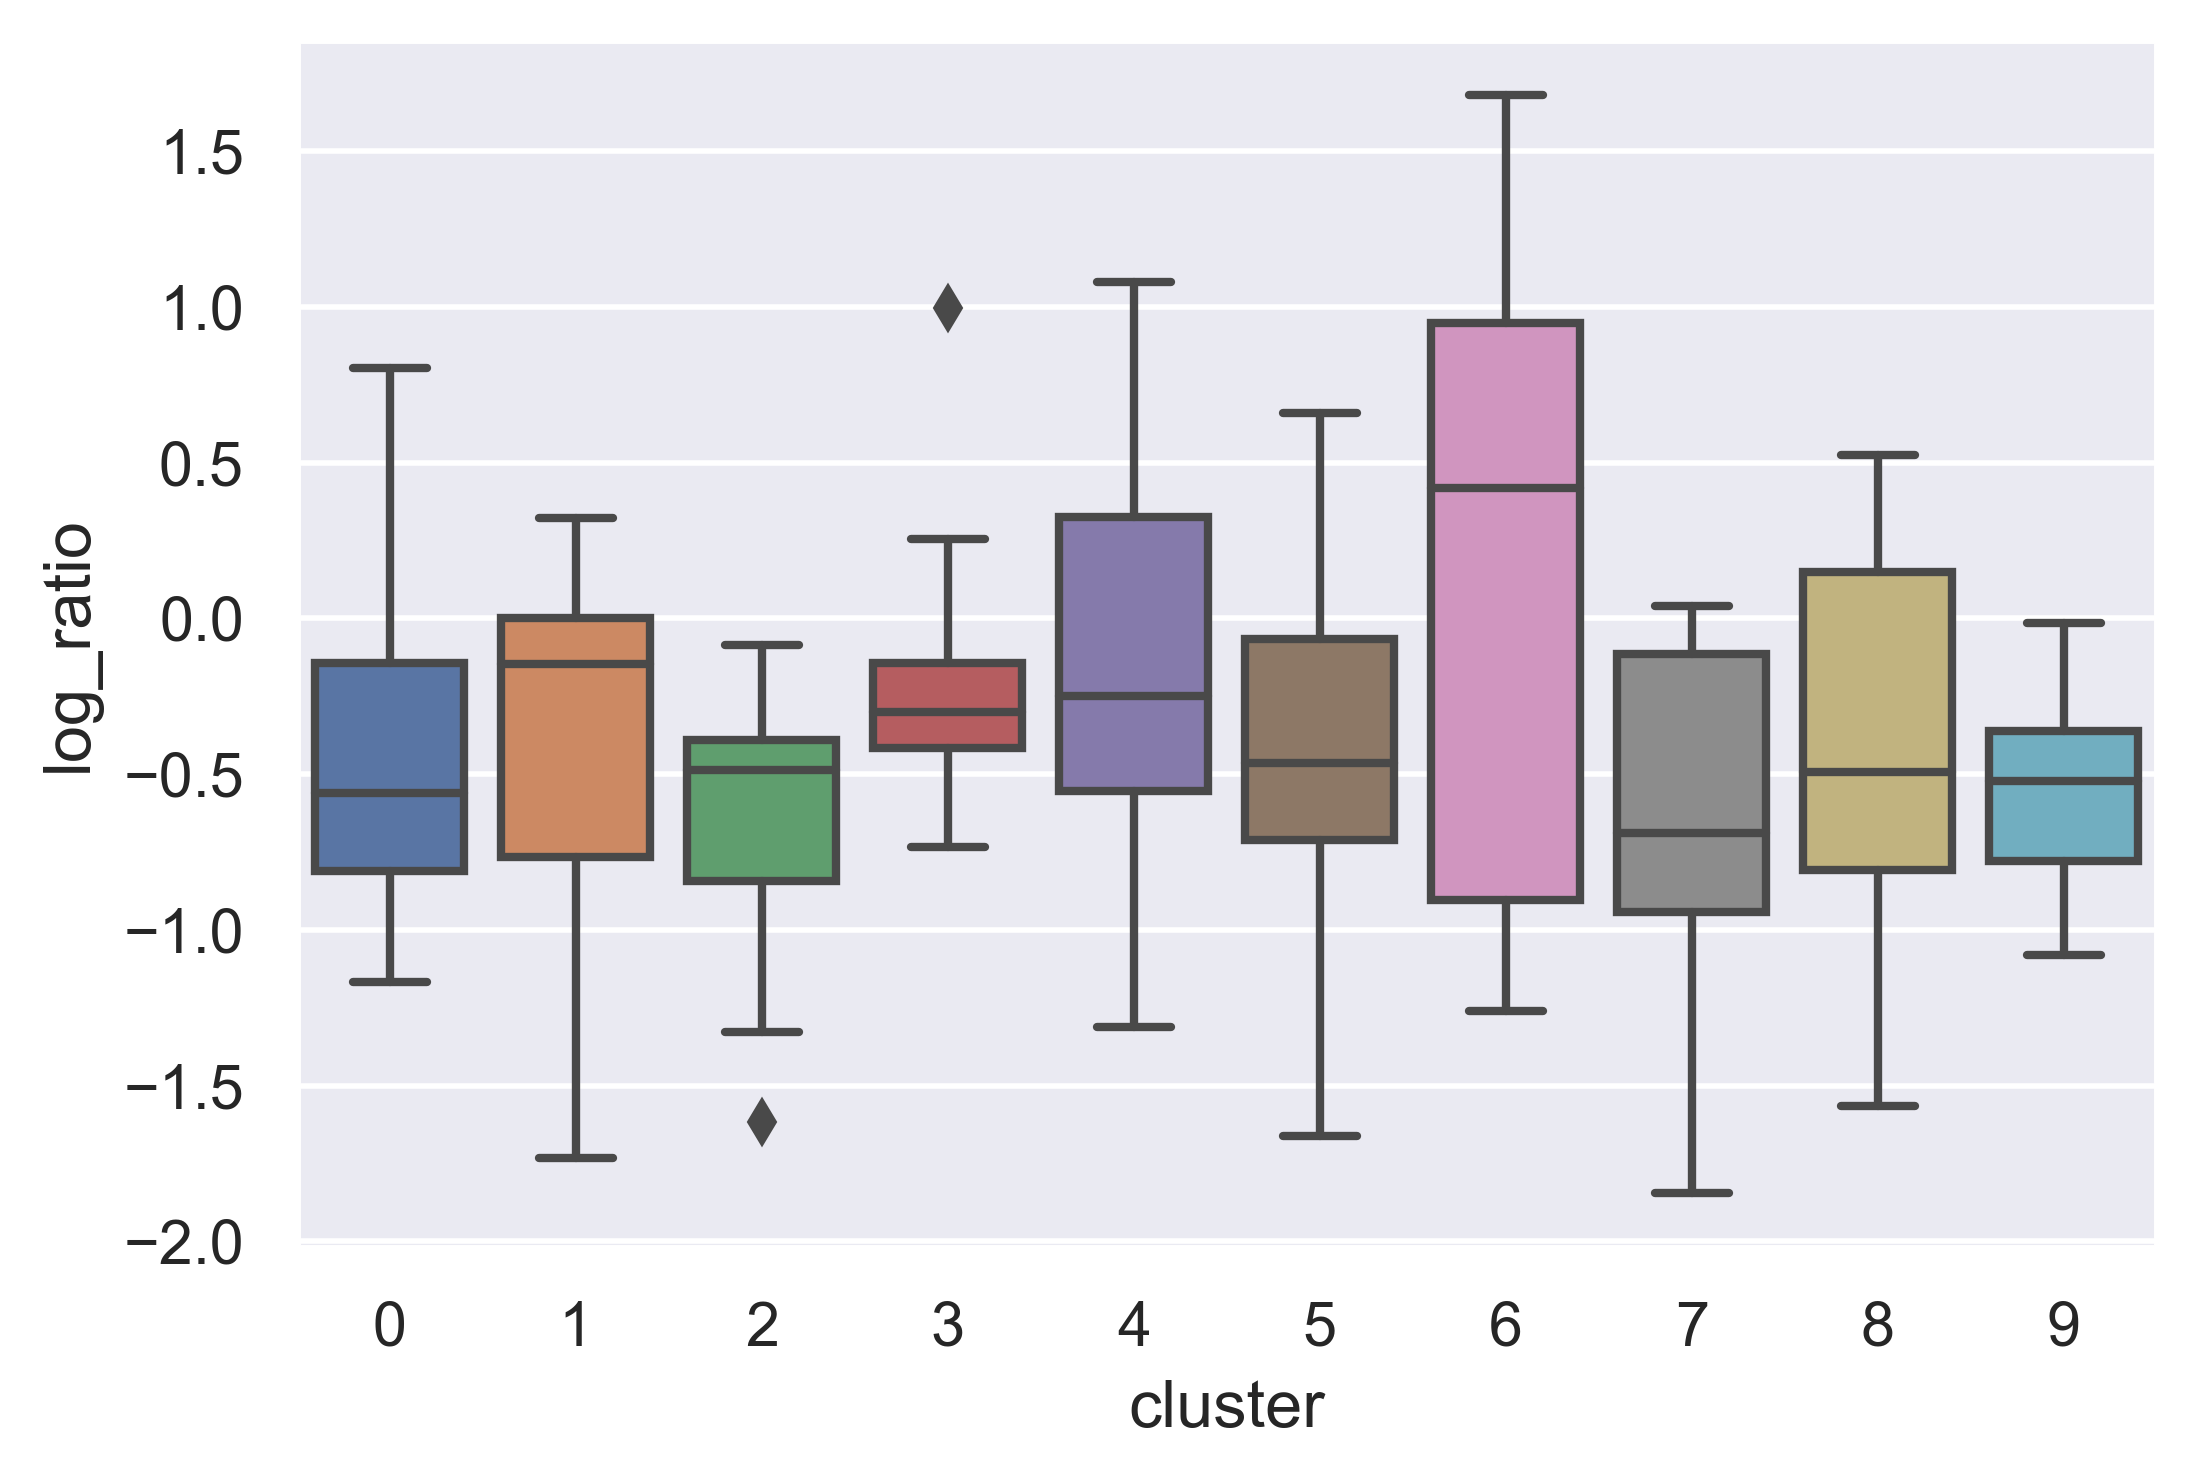

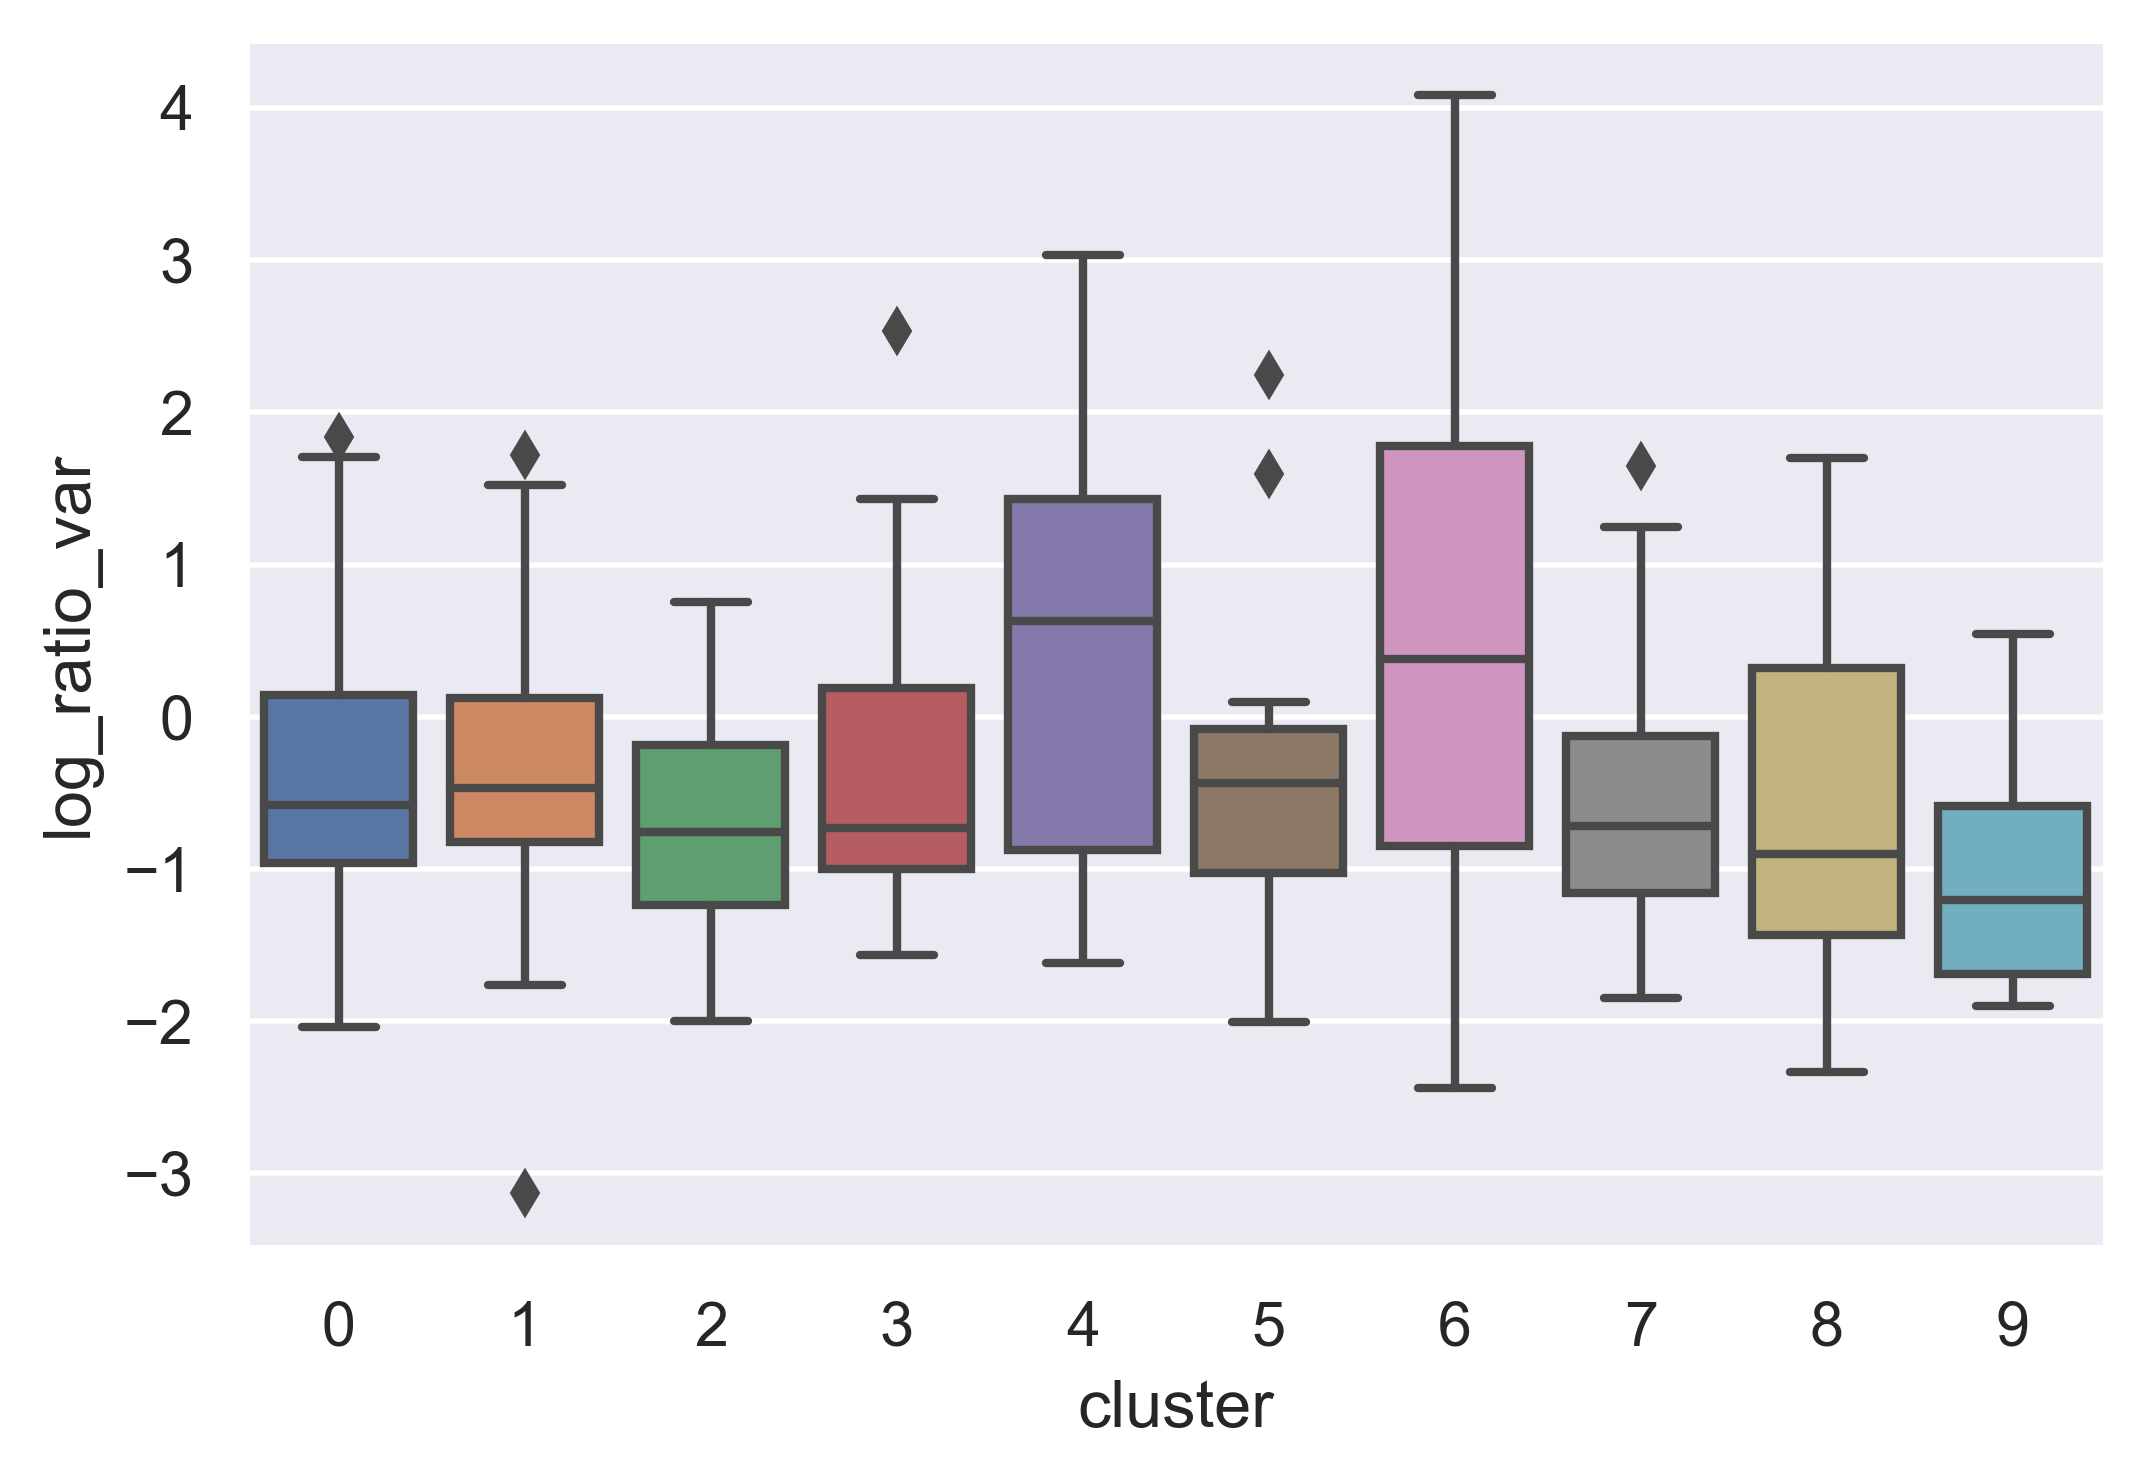

In [148]:
df = data_in[['cluster', 'ratio_median_opt-t', 'ratio_variance_opt-t', 'SOURCE_TYPE']].copy()
df['log_ratio'] = np.log10(df['ratio_median_opt-t'])
df['log_ratio_var'] = np.log10(df['ratio_variance_opt-t'])

plt.figure(dpi=400)
sns.boxplot(x='cluster', y='log_ratio', data=df)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='log_ratio', data=df)
plt.show()

plt.figure(dpi=400)
sns.boxplot(x='cluster', y='log_ratio_var', data=df)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='log_ratio_var', data=df)
plt.show()

C:\Users\psyko\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


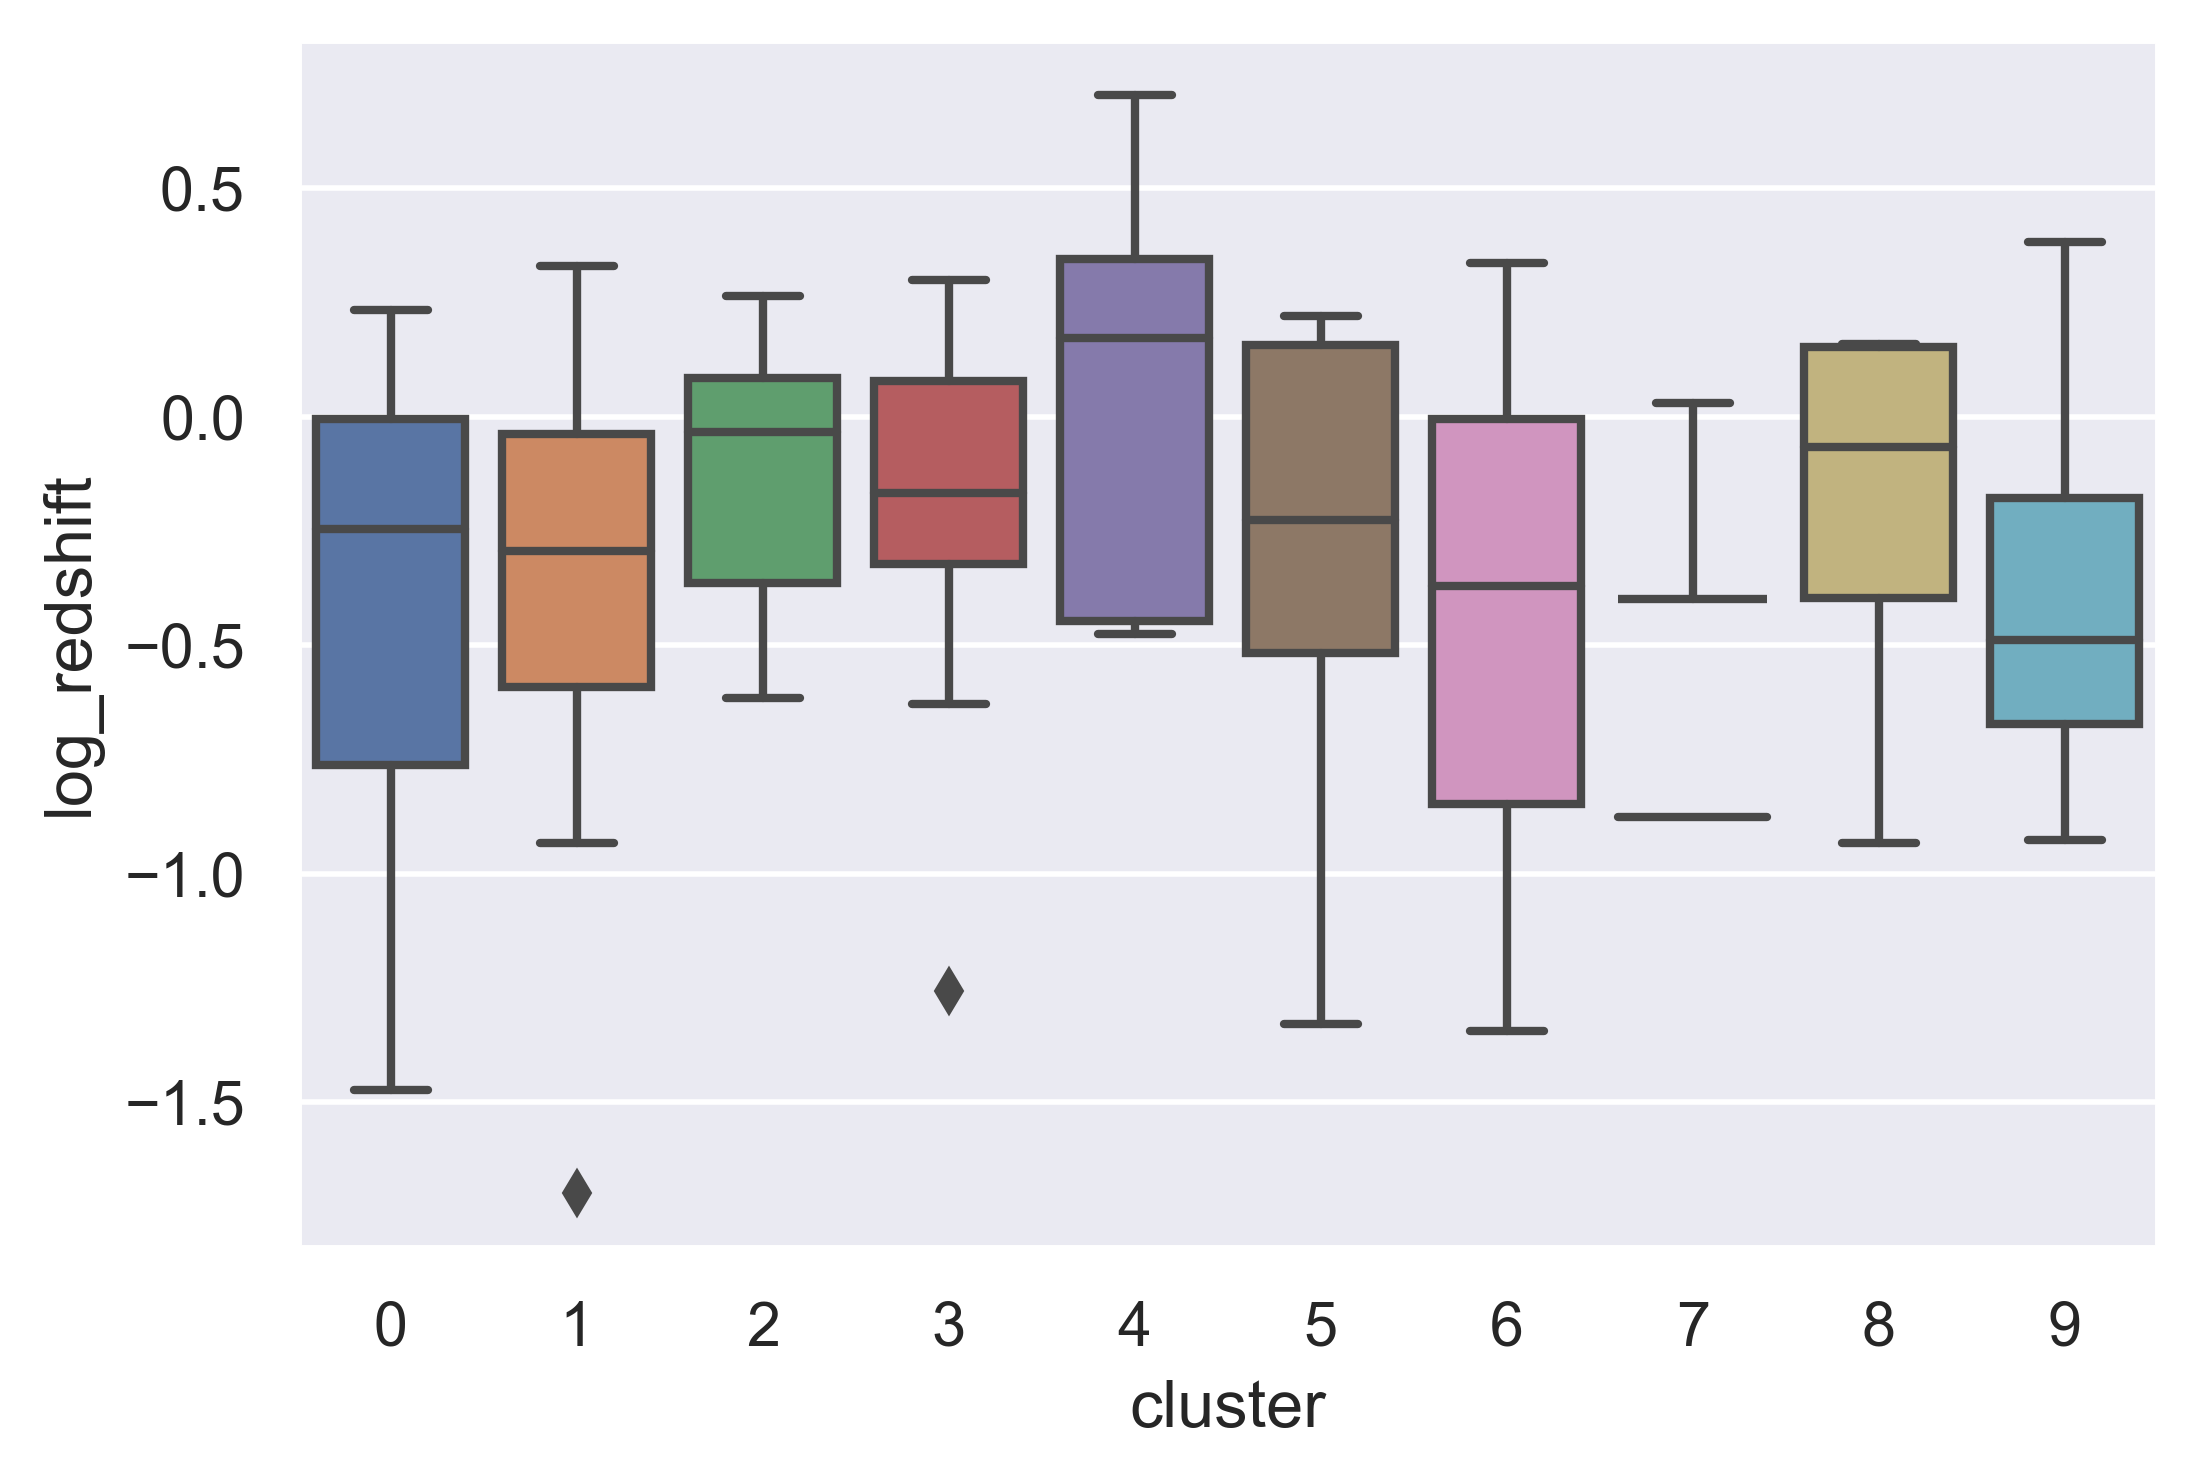

In [149]:
df = data_in[['cluster', 'redshift', 'SOURCE_TYPE']].copy()
df['log_redshift'] = np.log10(df['redshift'])

plt.figure(dpi=400)
sns.boxplot(x='cluster', y='log_redshift', data=df)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='log_redshift', data=df)
plt.show()

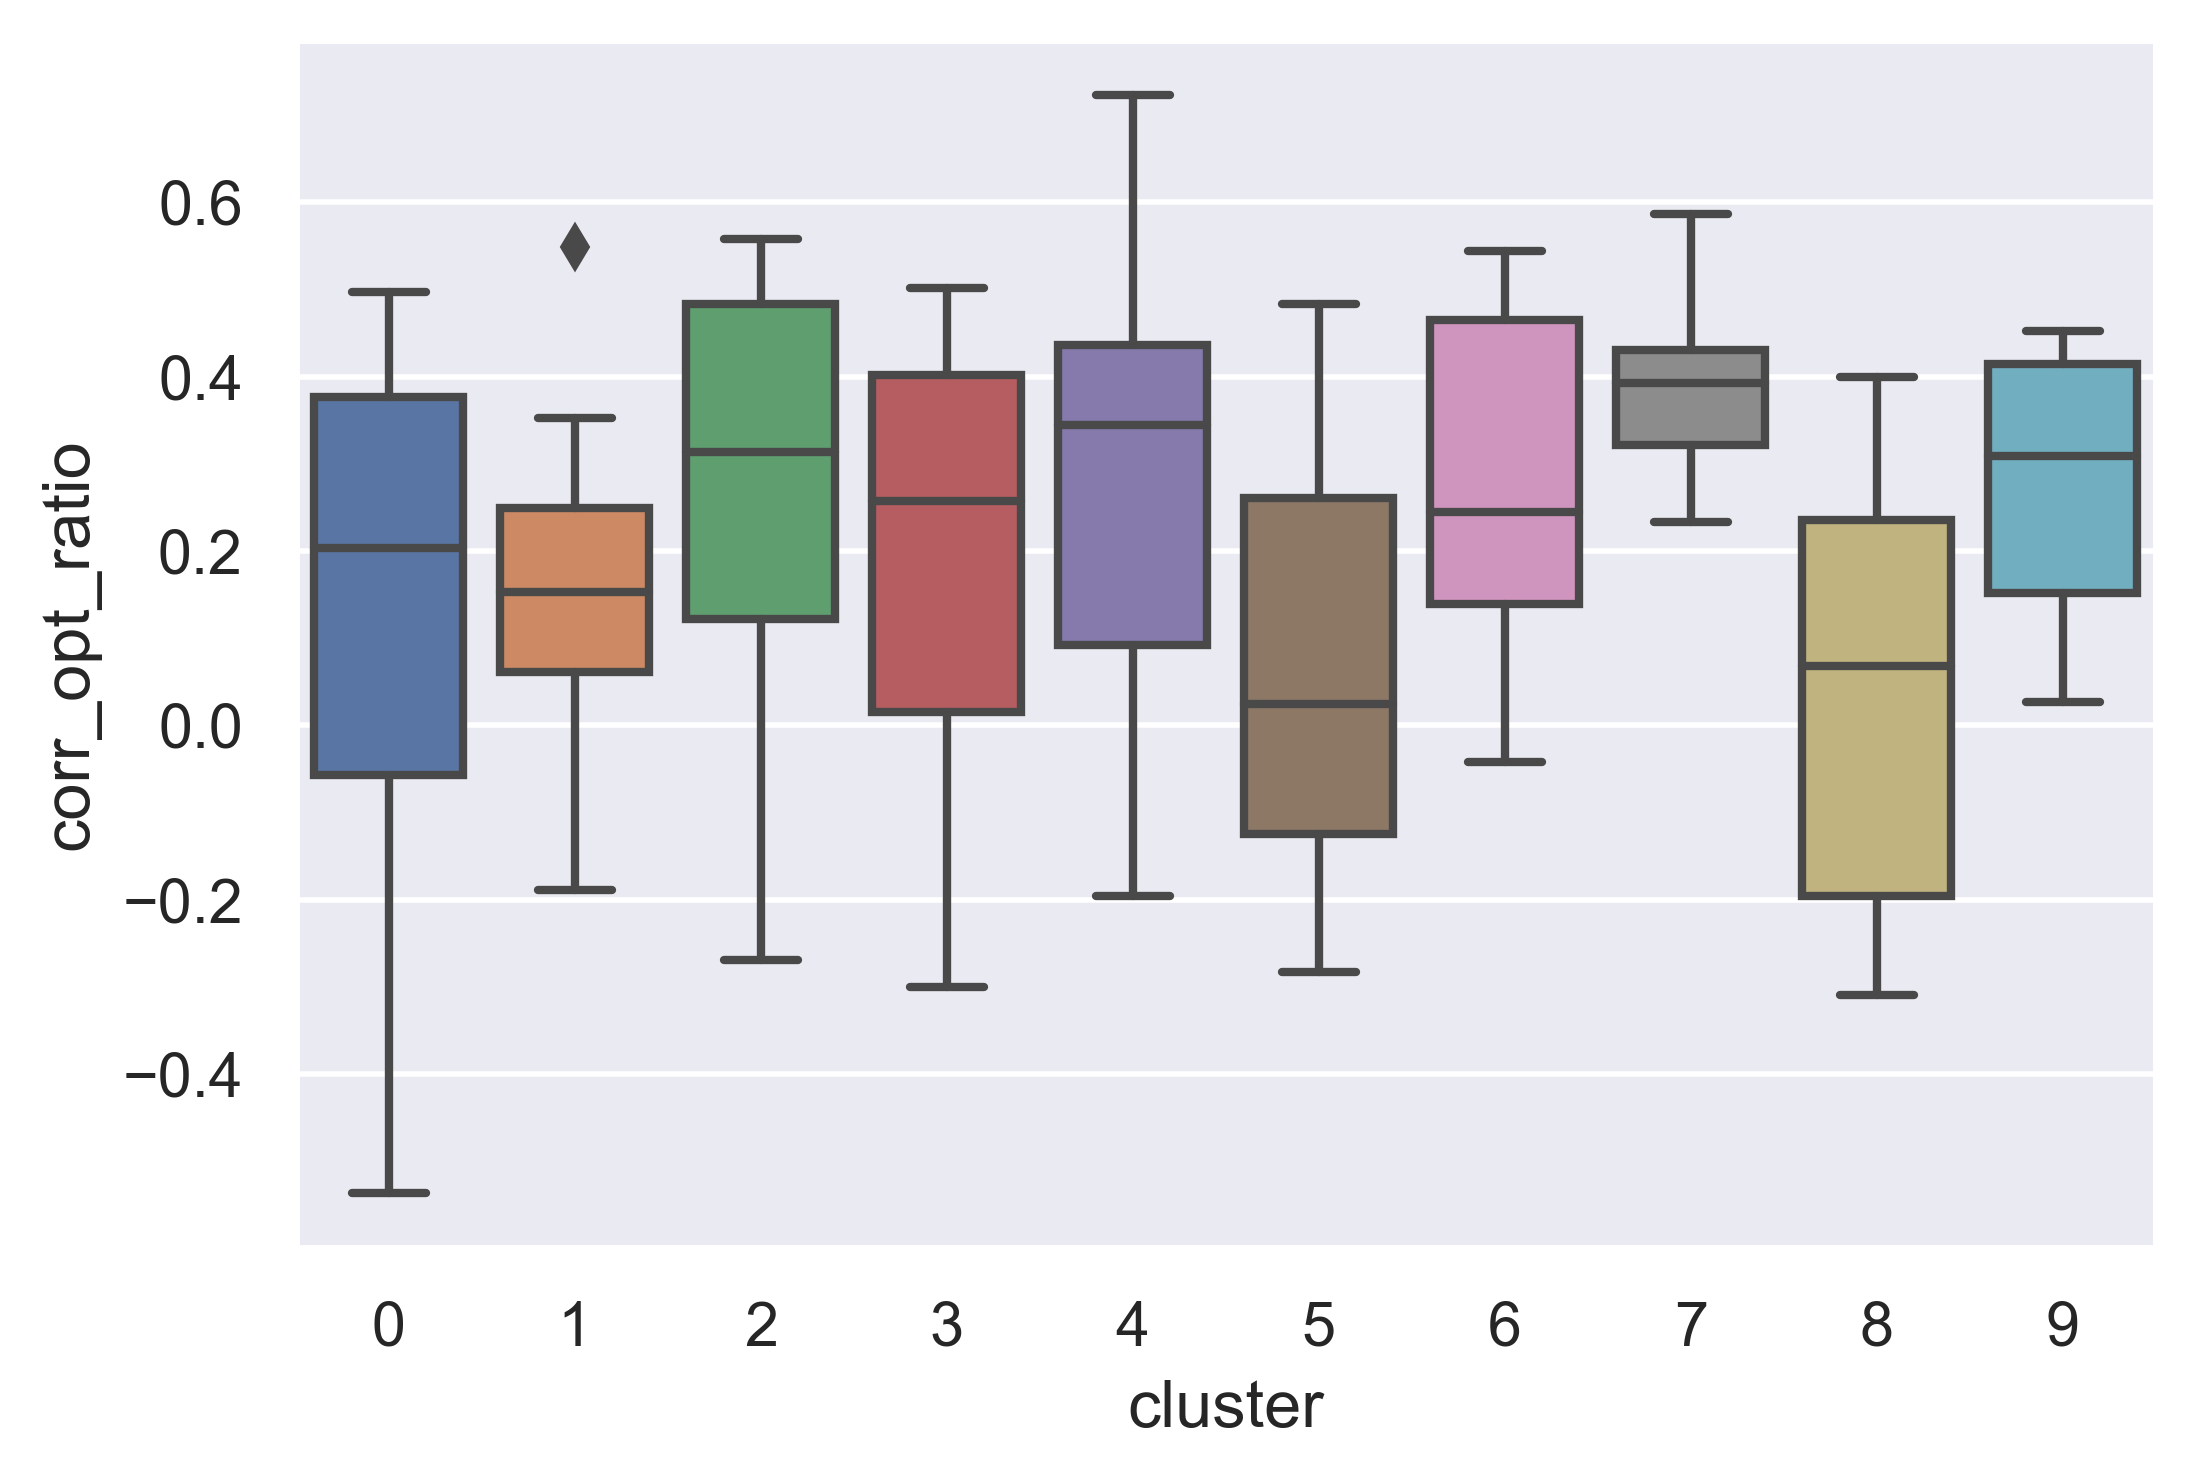

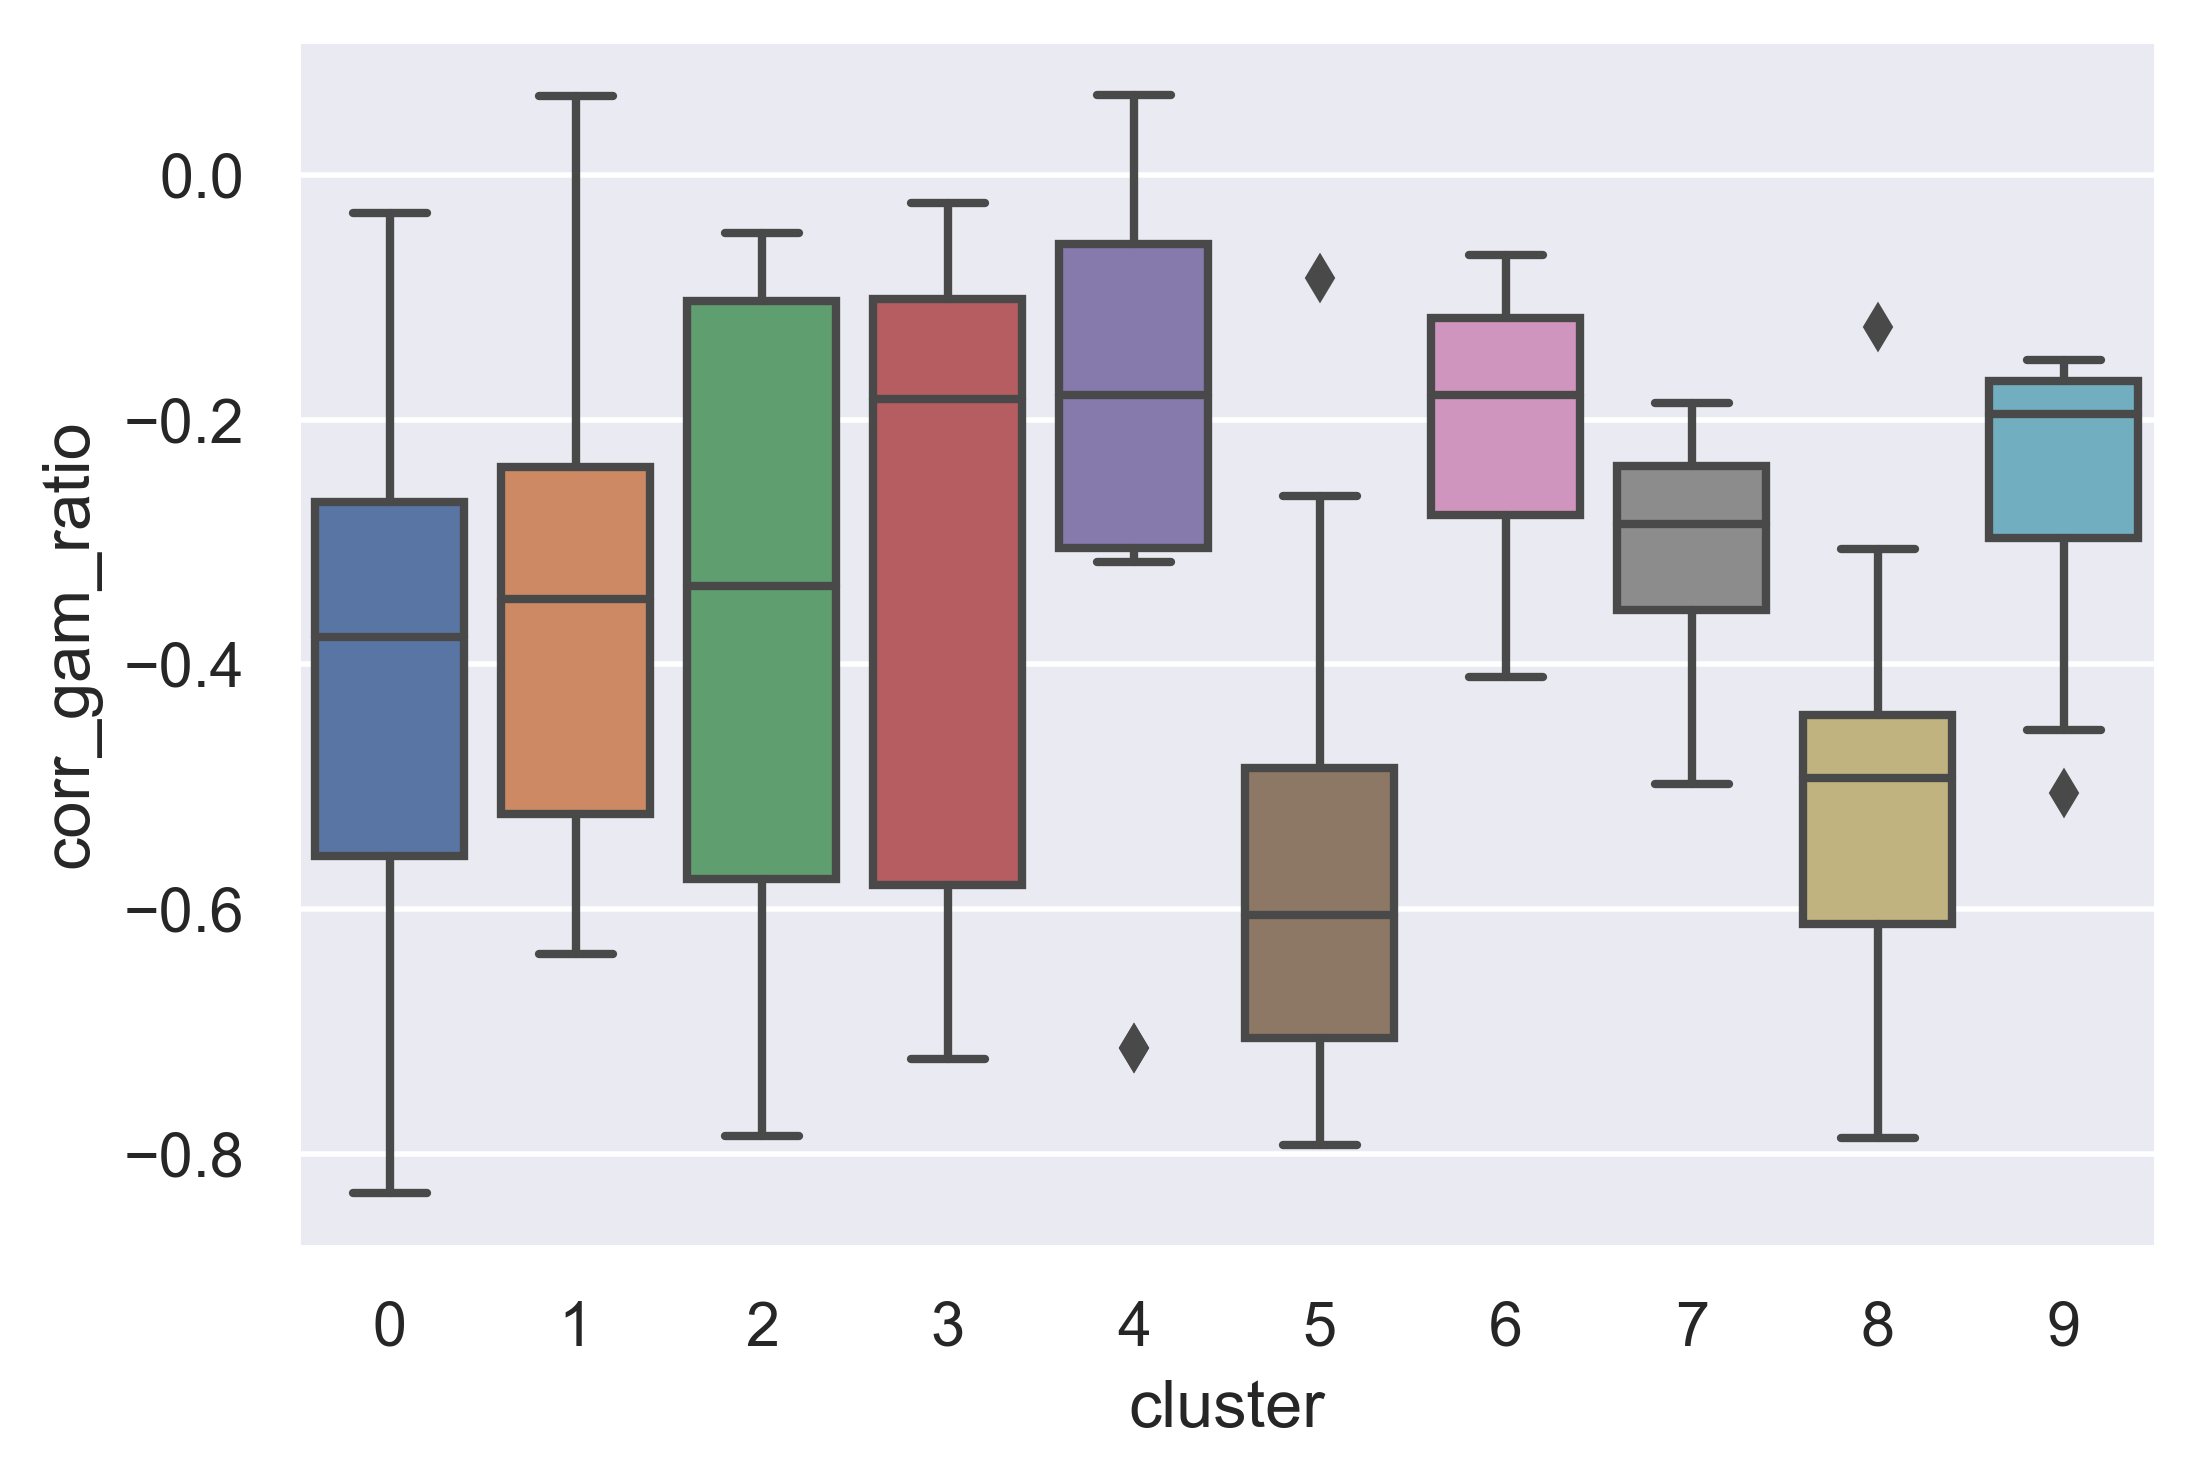

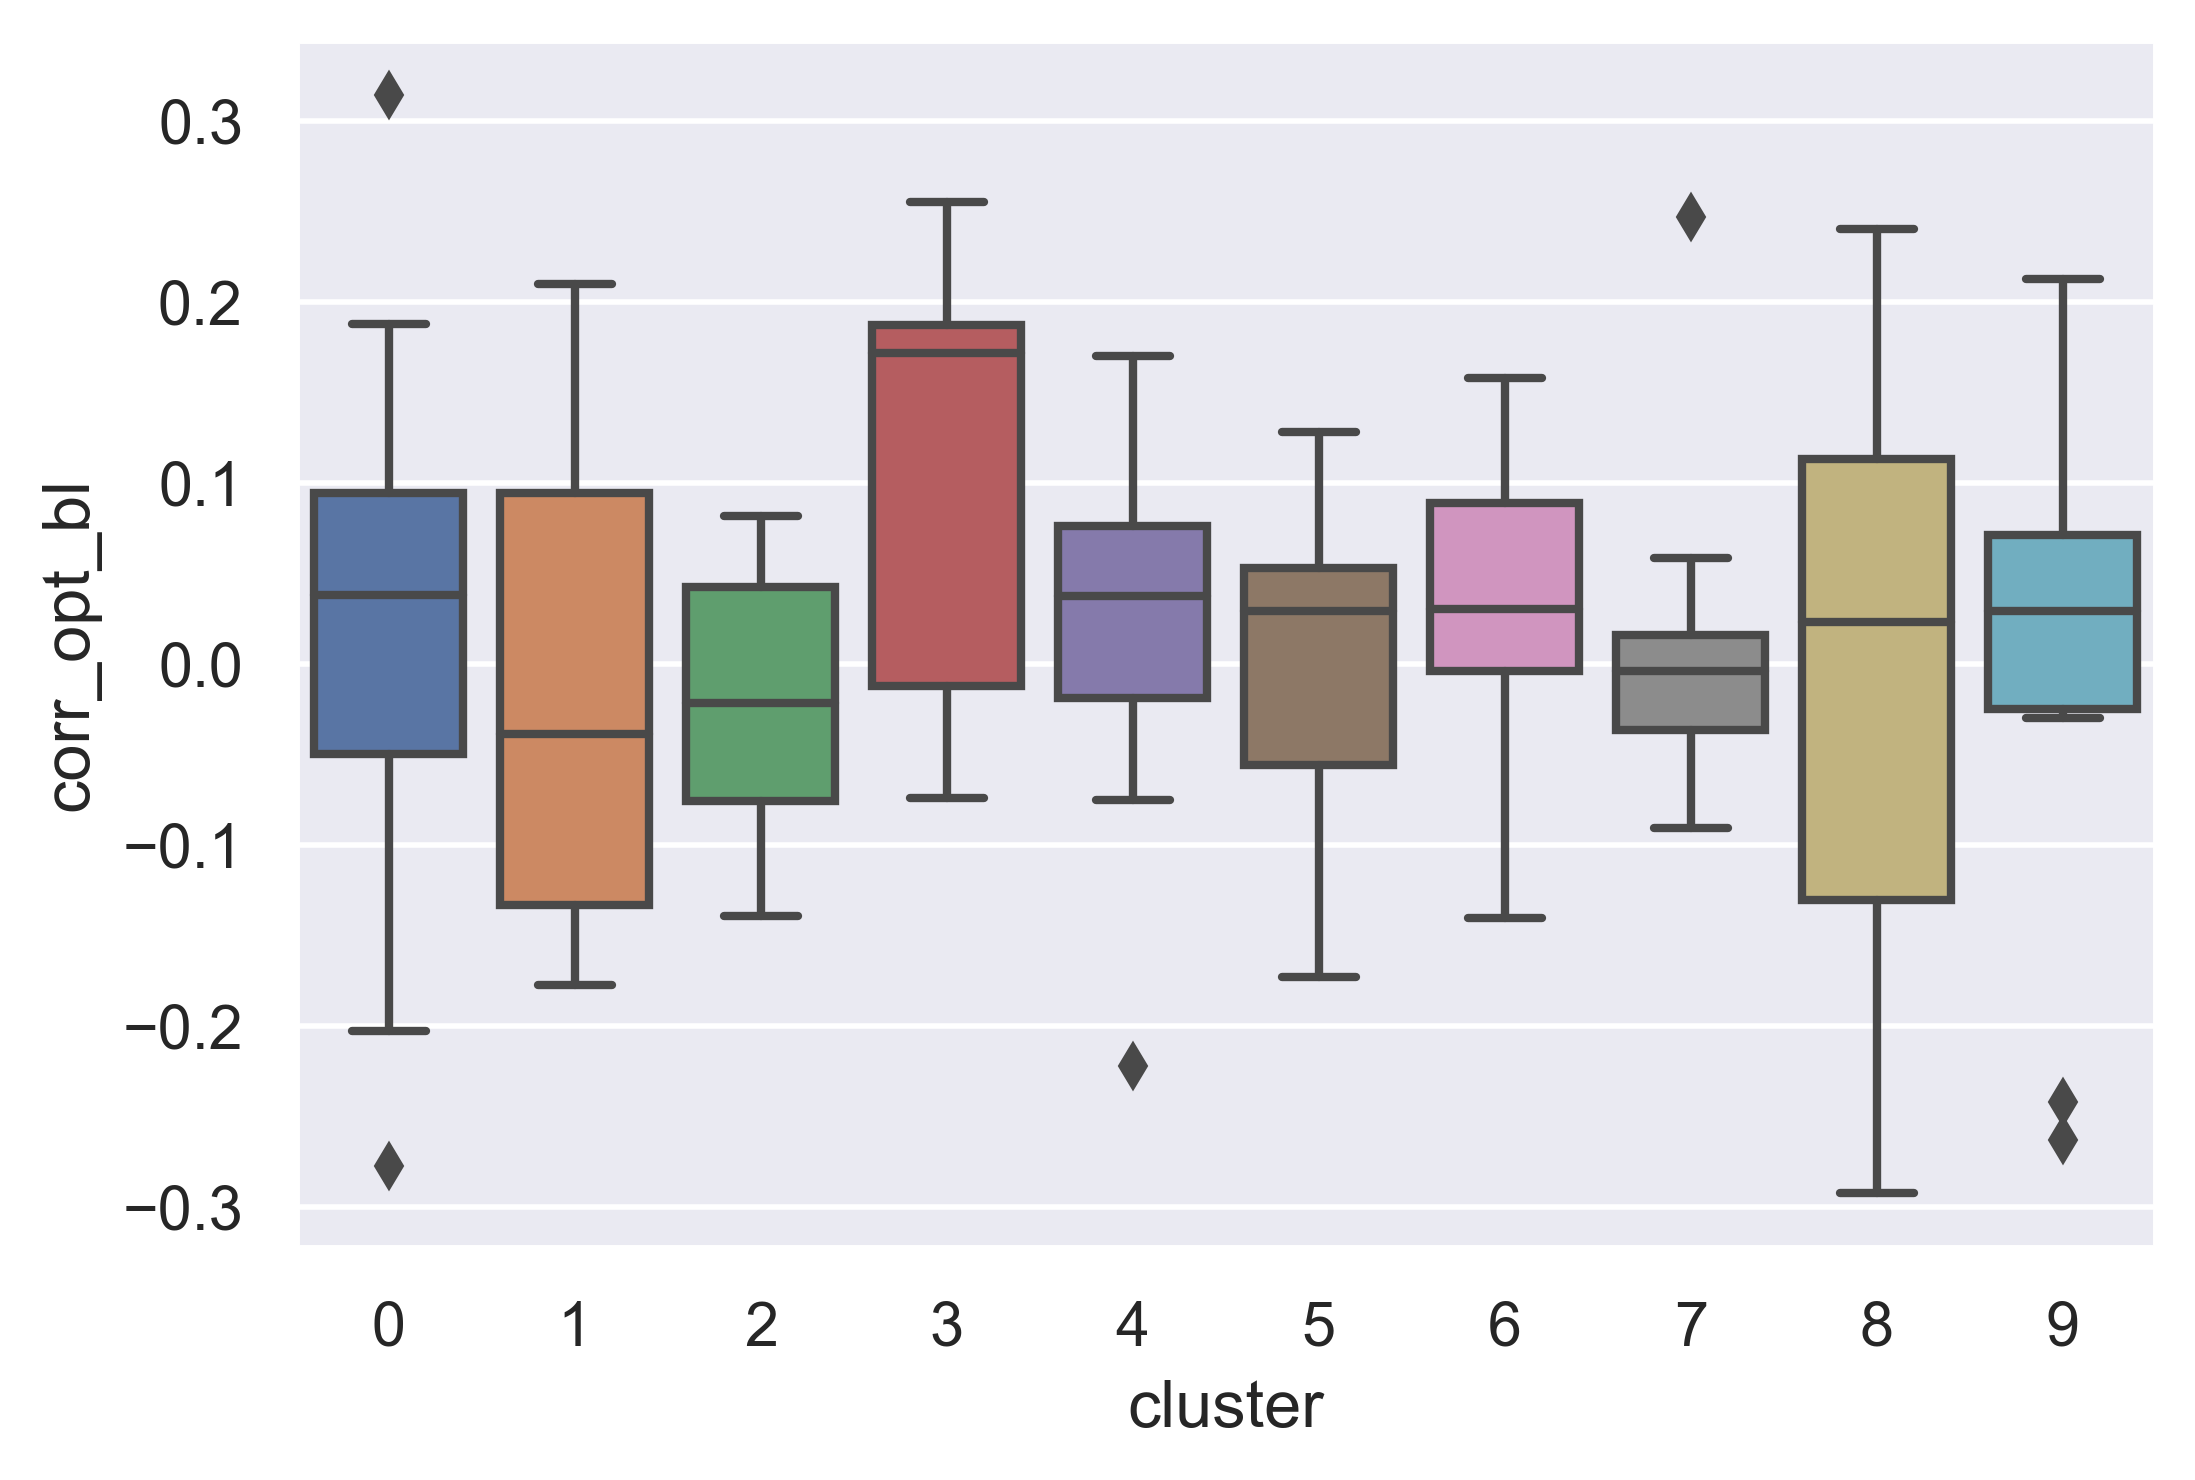

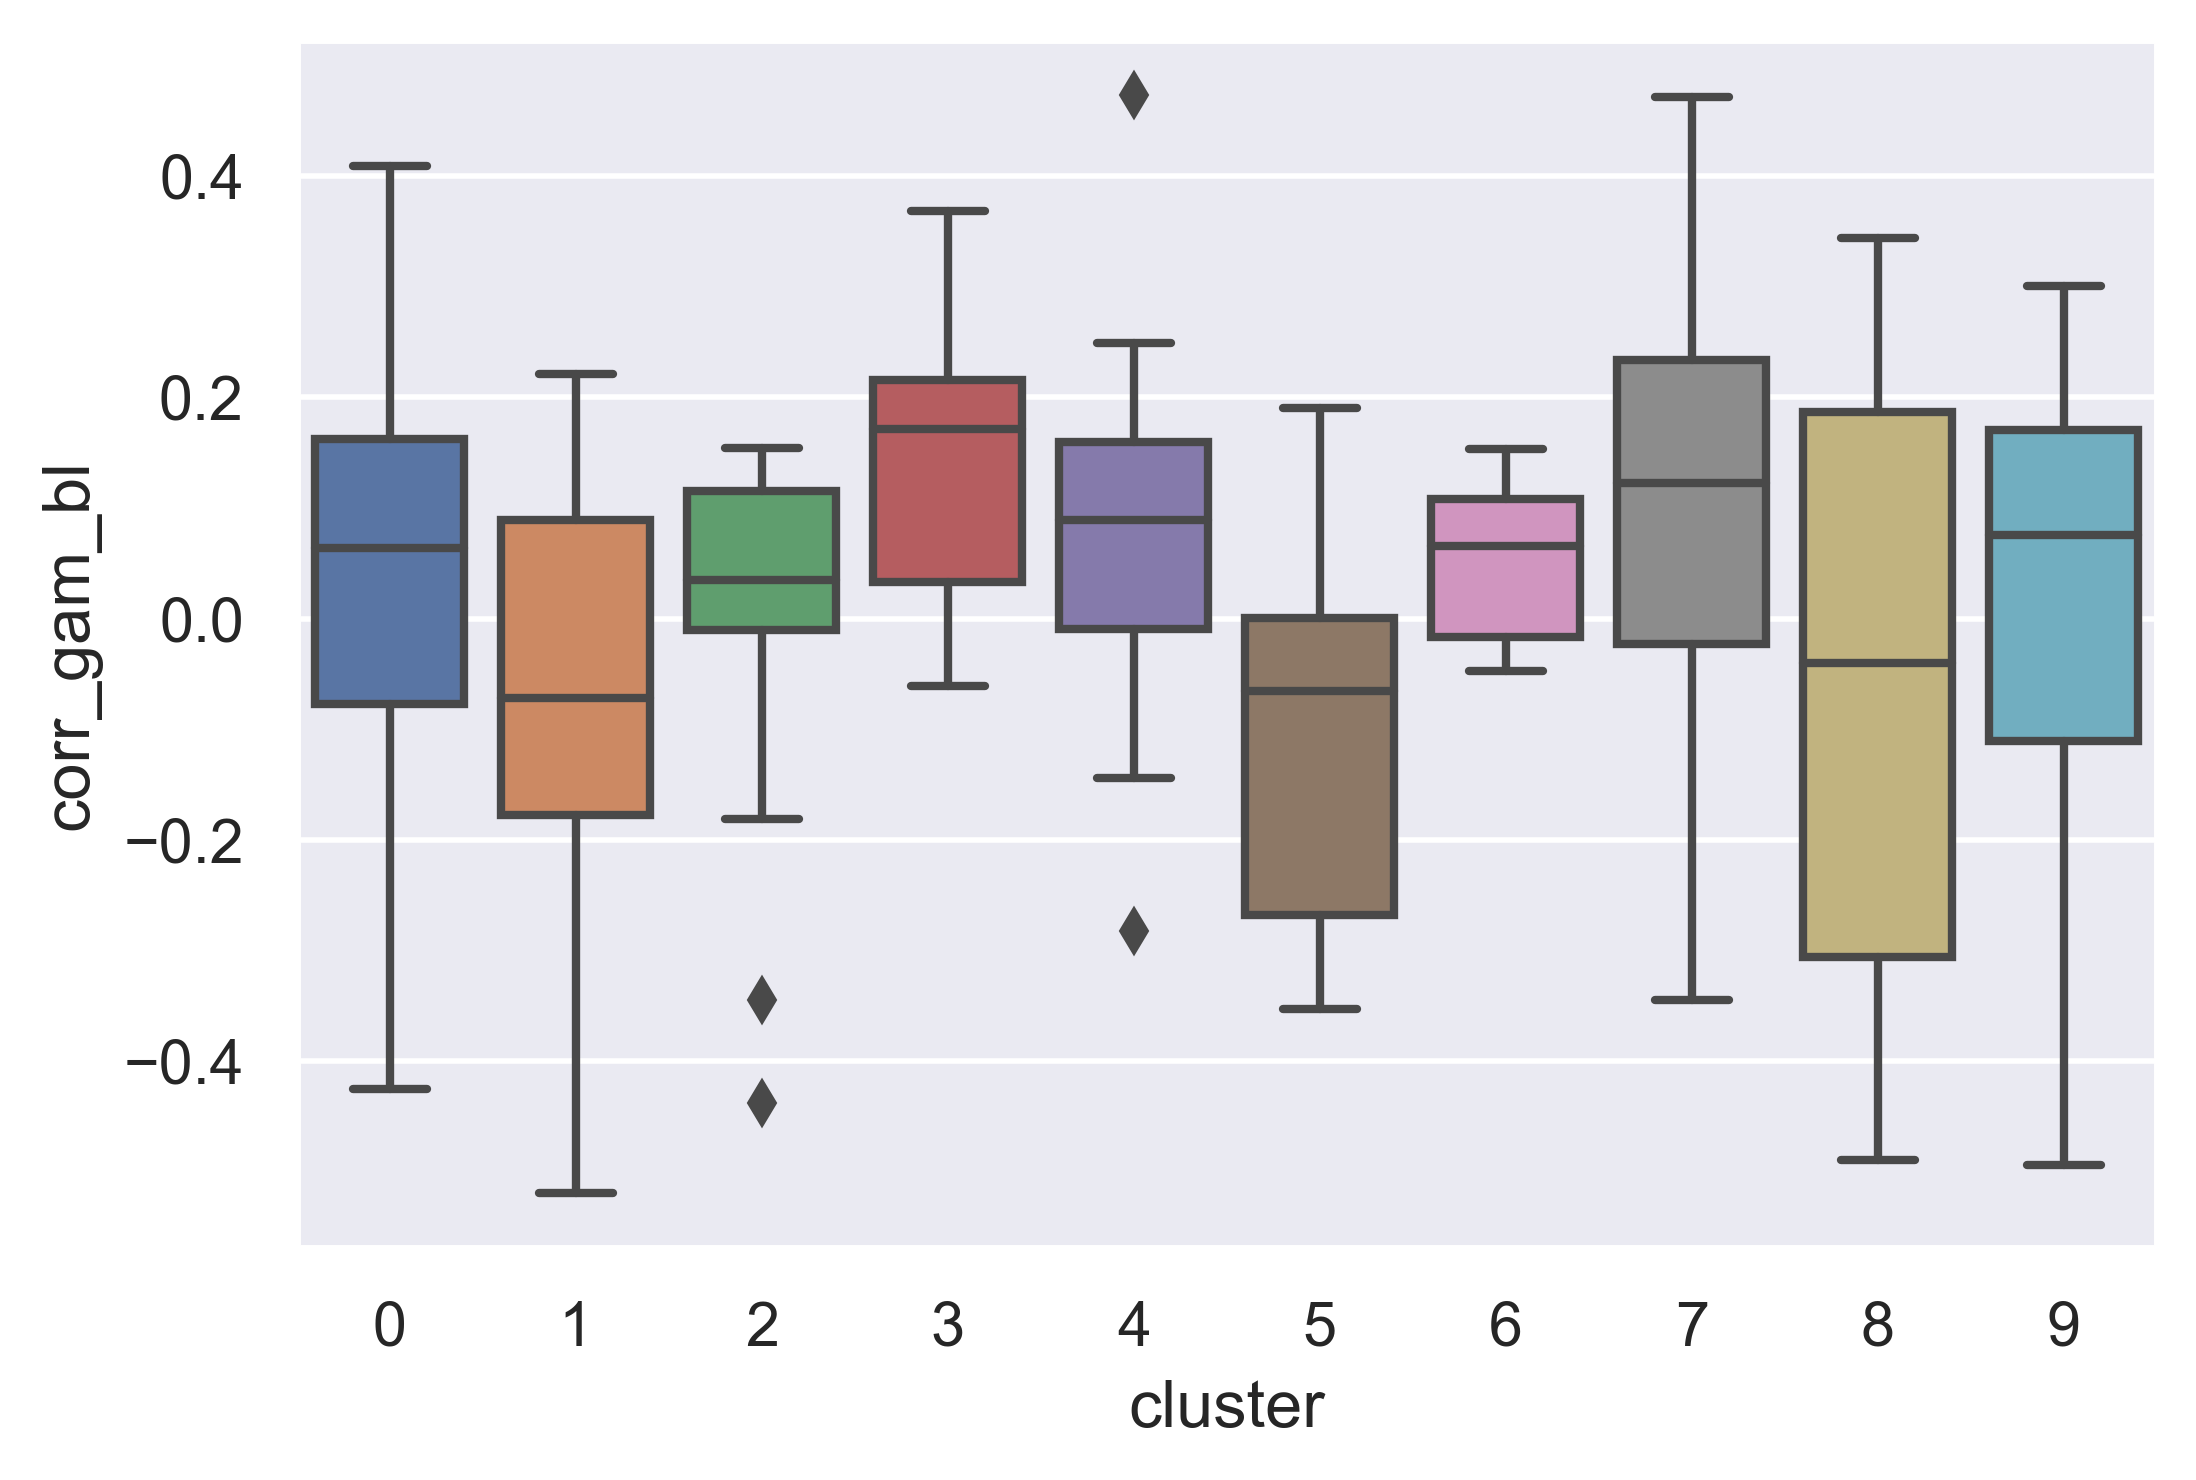

In [150]:
plt.figure(dpi=400)
sns.boxplot(x='cluster', y='corr_opt_ratio', data=data_in)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='corr_opt_ratio', data=data_in)
plt.show()

plt.figure(dpi=400)
sns.boxplot(x='cluster', y='corr_gam_ratio', data=data_in)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='corr_gam_ratio', data=data_in)
plt.show()

plt.figure(dpi=400)
sns.boxplot(x='cluster', y='corr_opt_bl', data=data_in)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='corr_opt_bl', data=data_in)
plt.show()

plt.figure(dpi=400)
sns.boxplot(x='cluster', y='corr_gam_bl', data=data_in)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='corr_gam_bl', data=data_in)
plt.show()

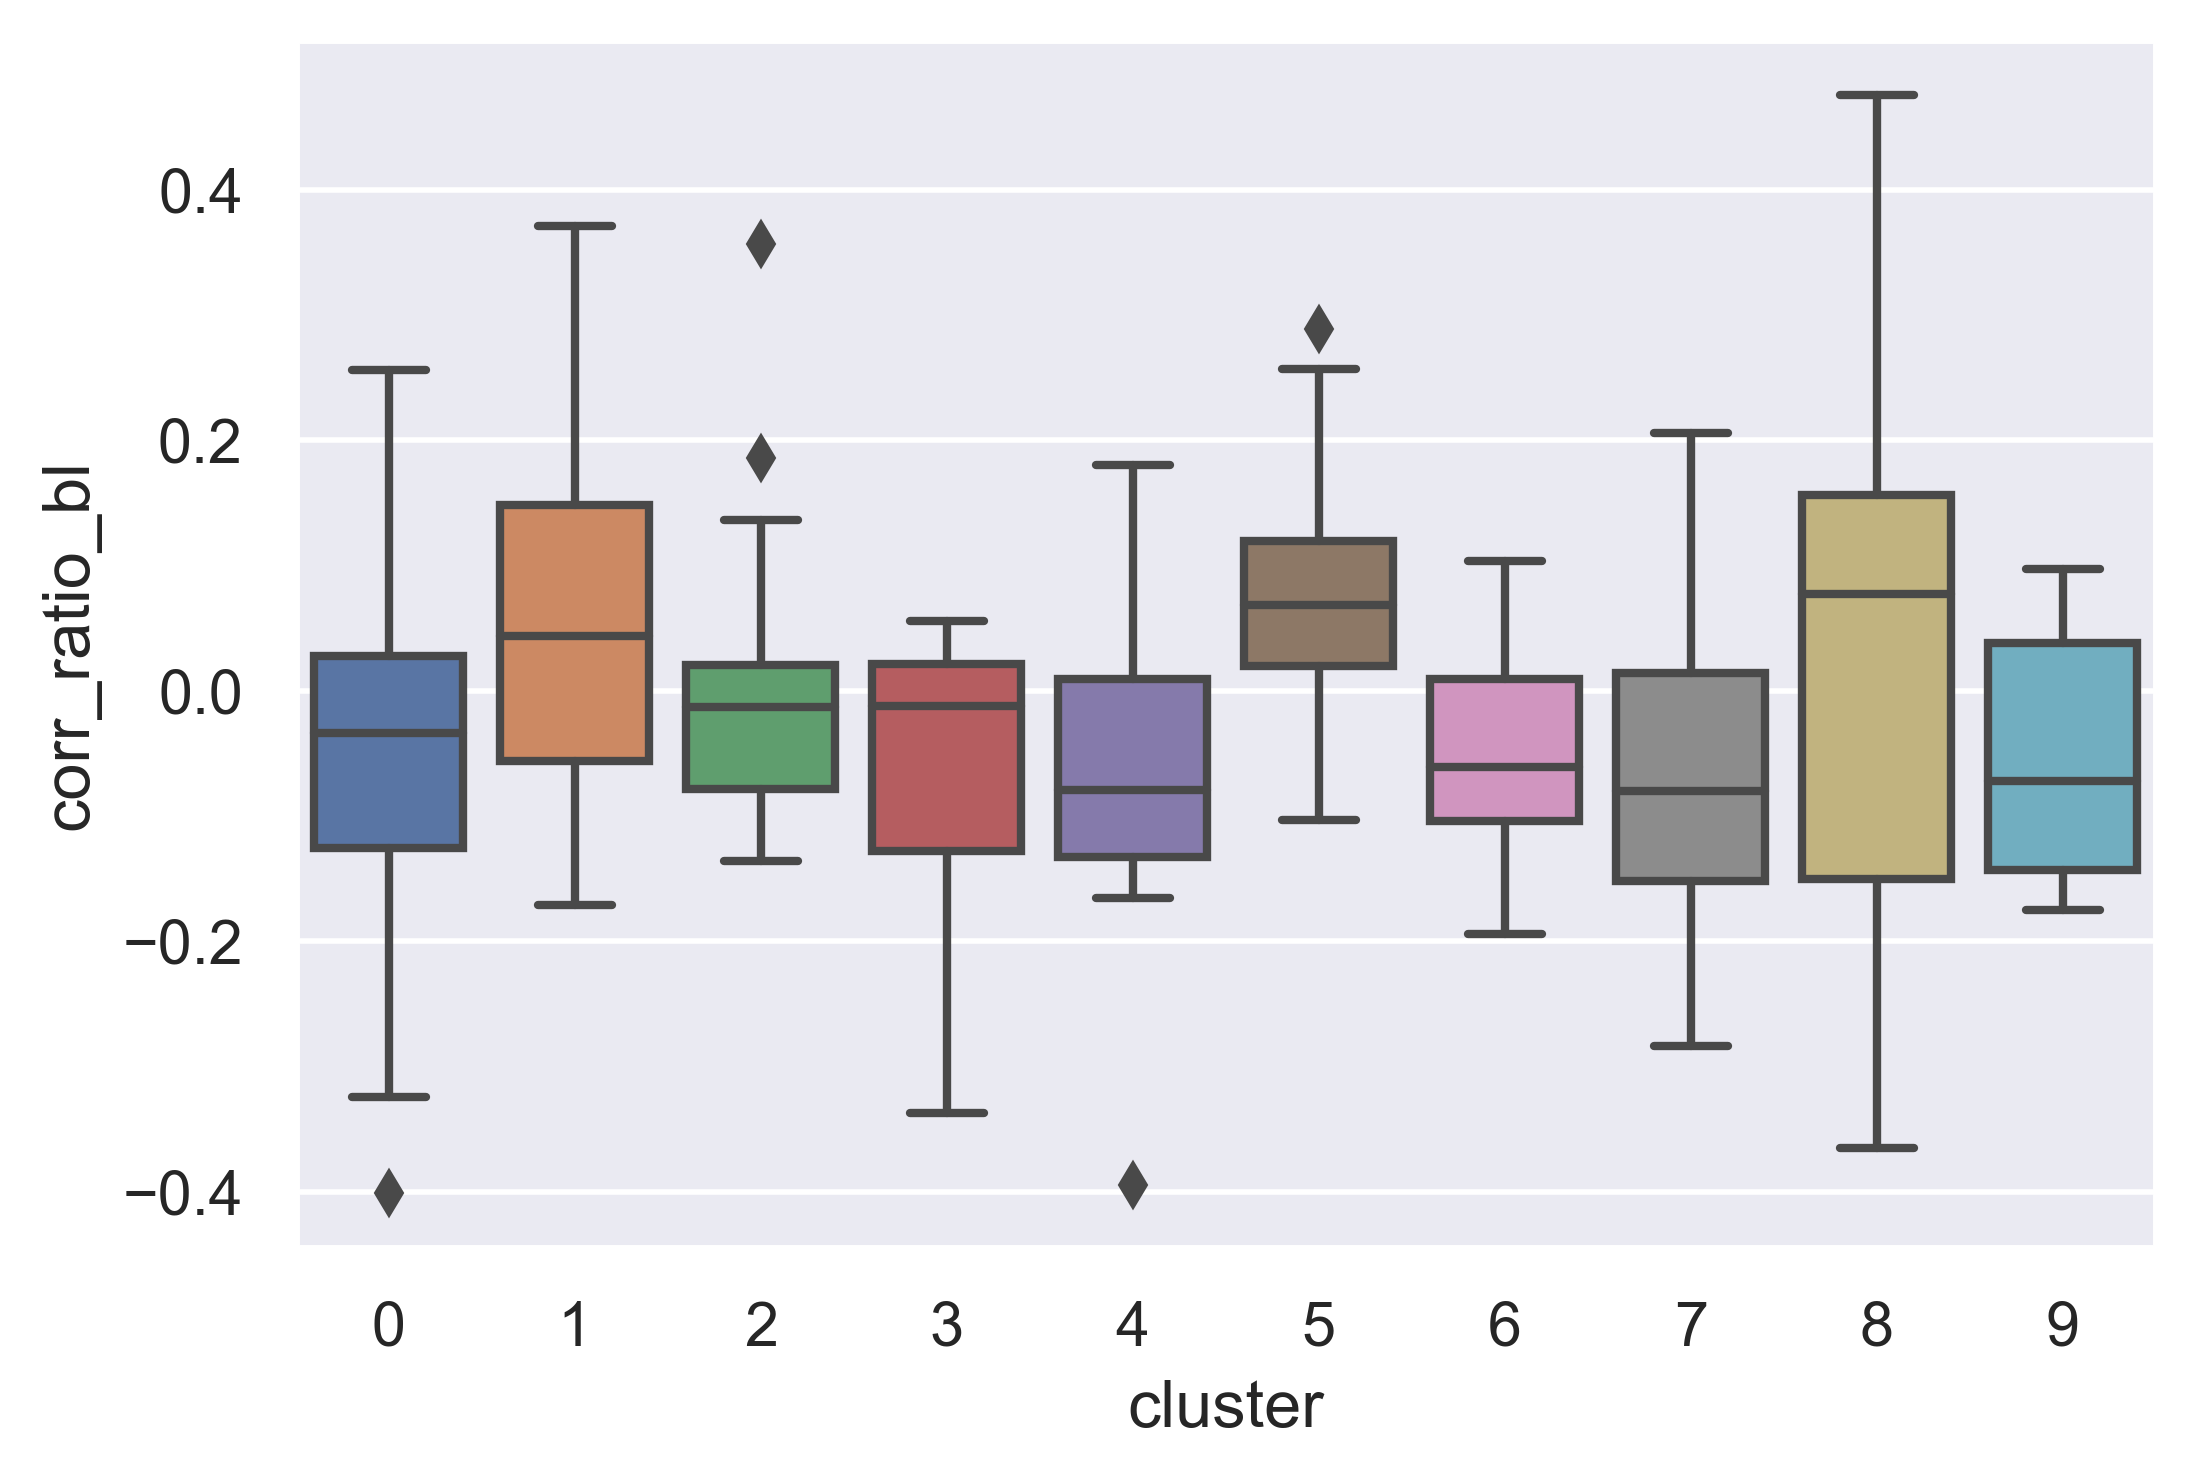

In [151]:
plt.figure(dpi=400)
sns.boxplot(x='cluster', y='corr_ratio_bl', data=data_in)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='corr_ratio_bl', data=data_in)
plt.show()

# sns.boxplot(x='cluster', y='corr_gam_ratio', data=data_in)
# sns.swarmplot(x='cluster', y='corr_gam_ratio', data=data_in)
# plt.show()

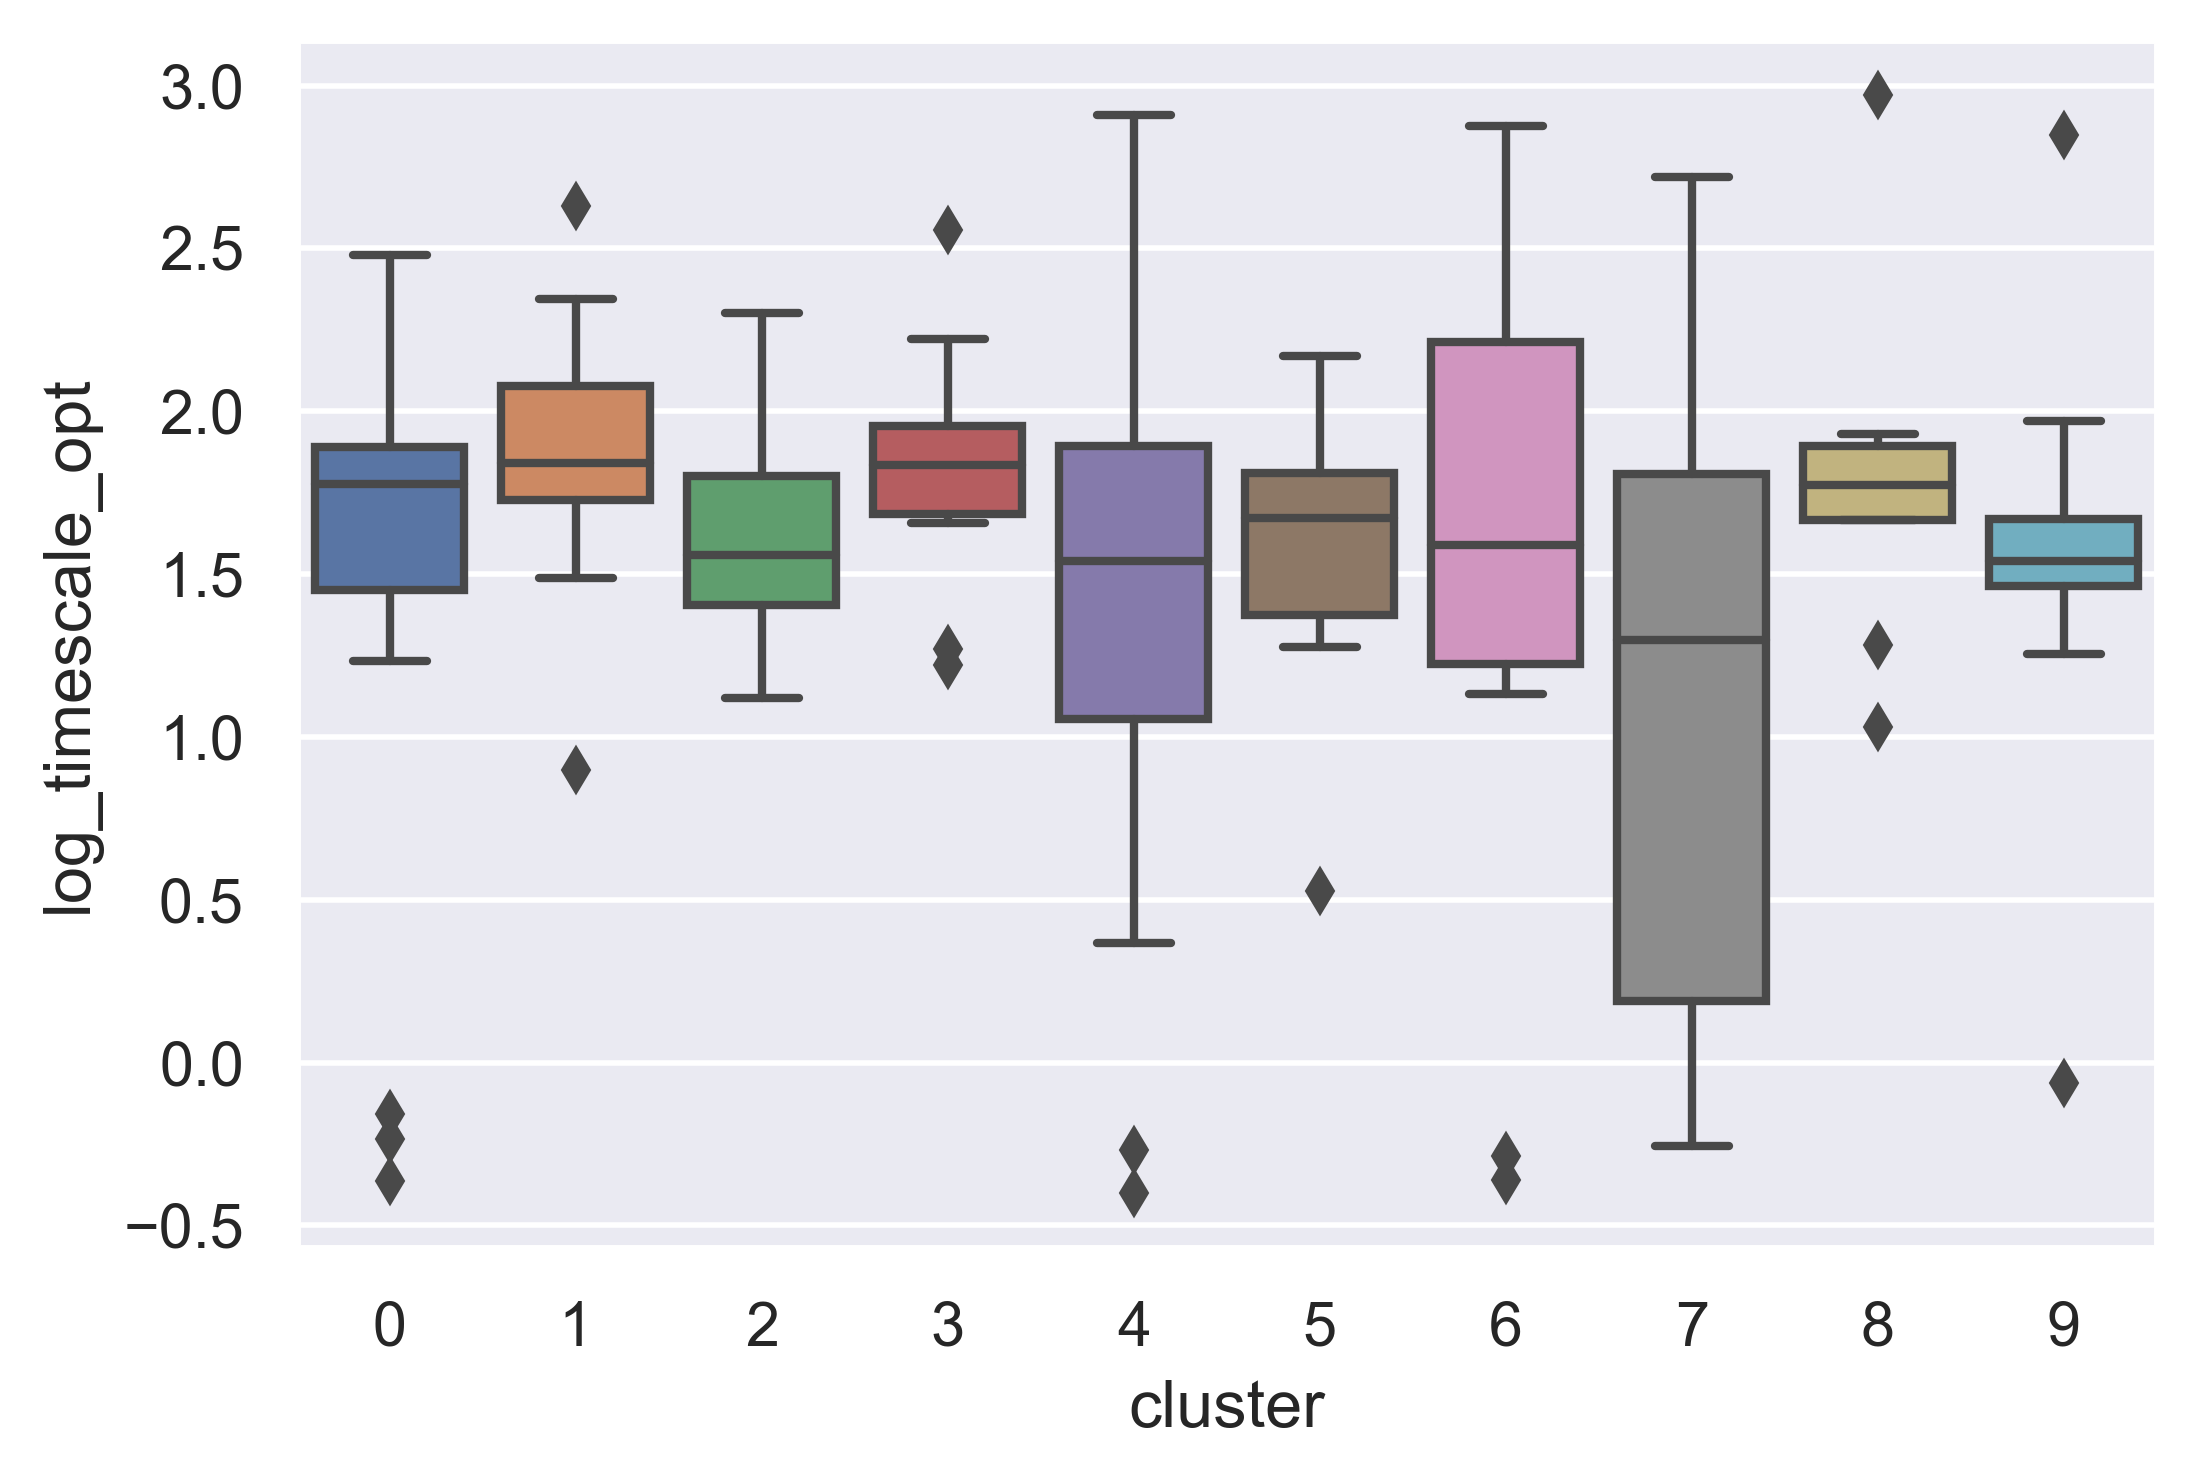

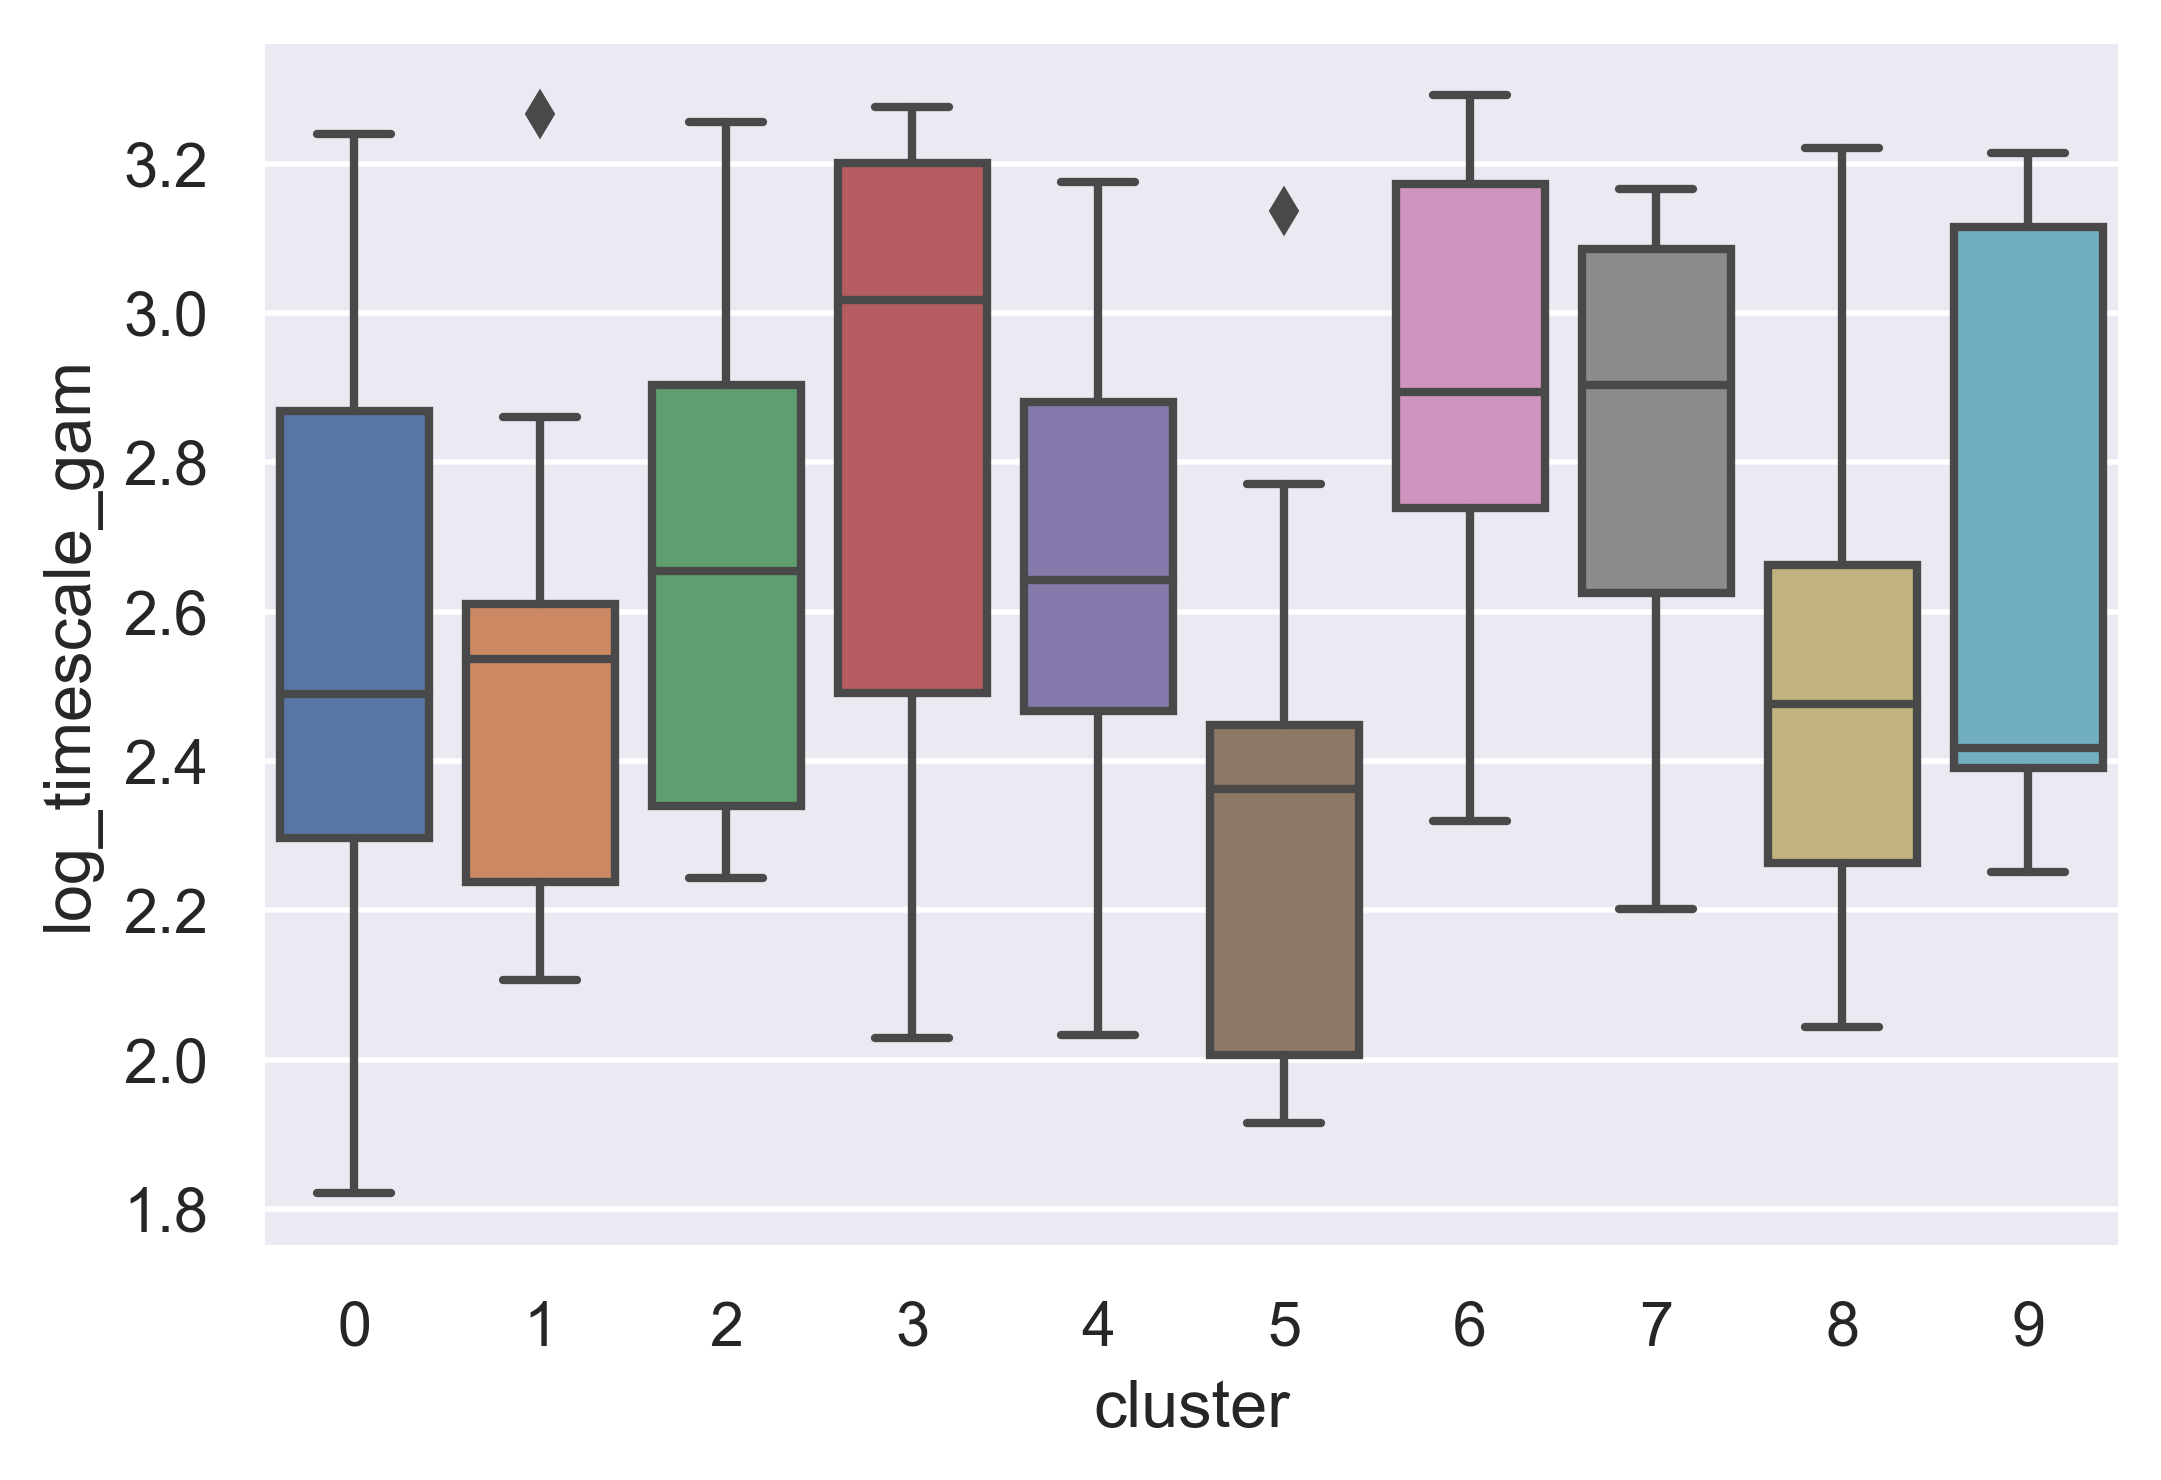

In [152]:
df = data_in[['cluster', 'timescale_opt', 'timescale_gam', 'SOURCE_TYPE']].copy()
df['log_timescale_opt'] = np.log10(df['timescale_opt'])
df['log_timescale_gam'] = np.log10(df['timescale_gam'])

plt.figure(dpi=400)
sns.boxplot(x='cluster', y='log_timescale_opt', data=df)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='log_timescale_opt', data=df)
plt.show()

plt.figure(dpi=400)
sns.boxplot(x='cluster', y='log_timescale_gam', data=df)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='log_timescale_gam', data=df)
plt.show()

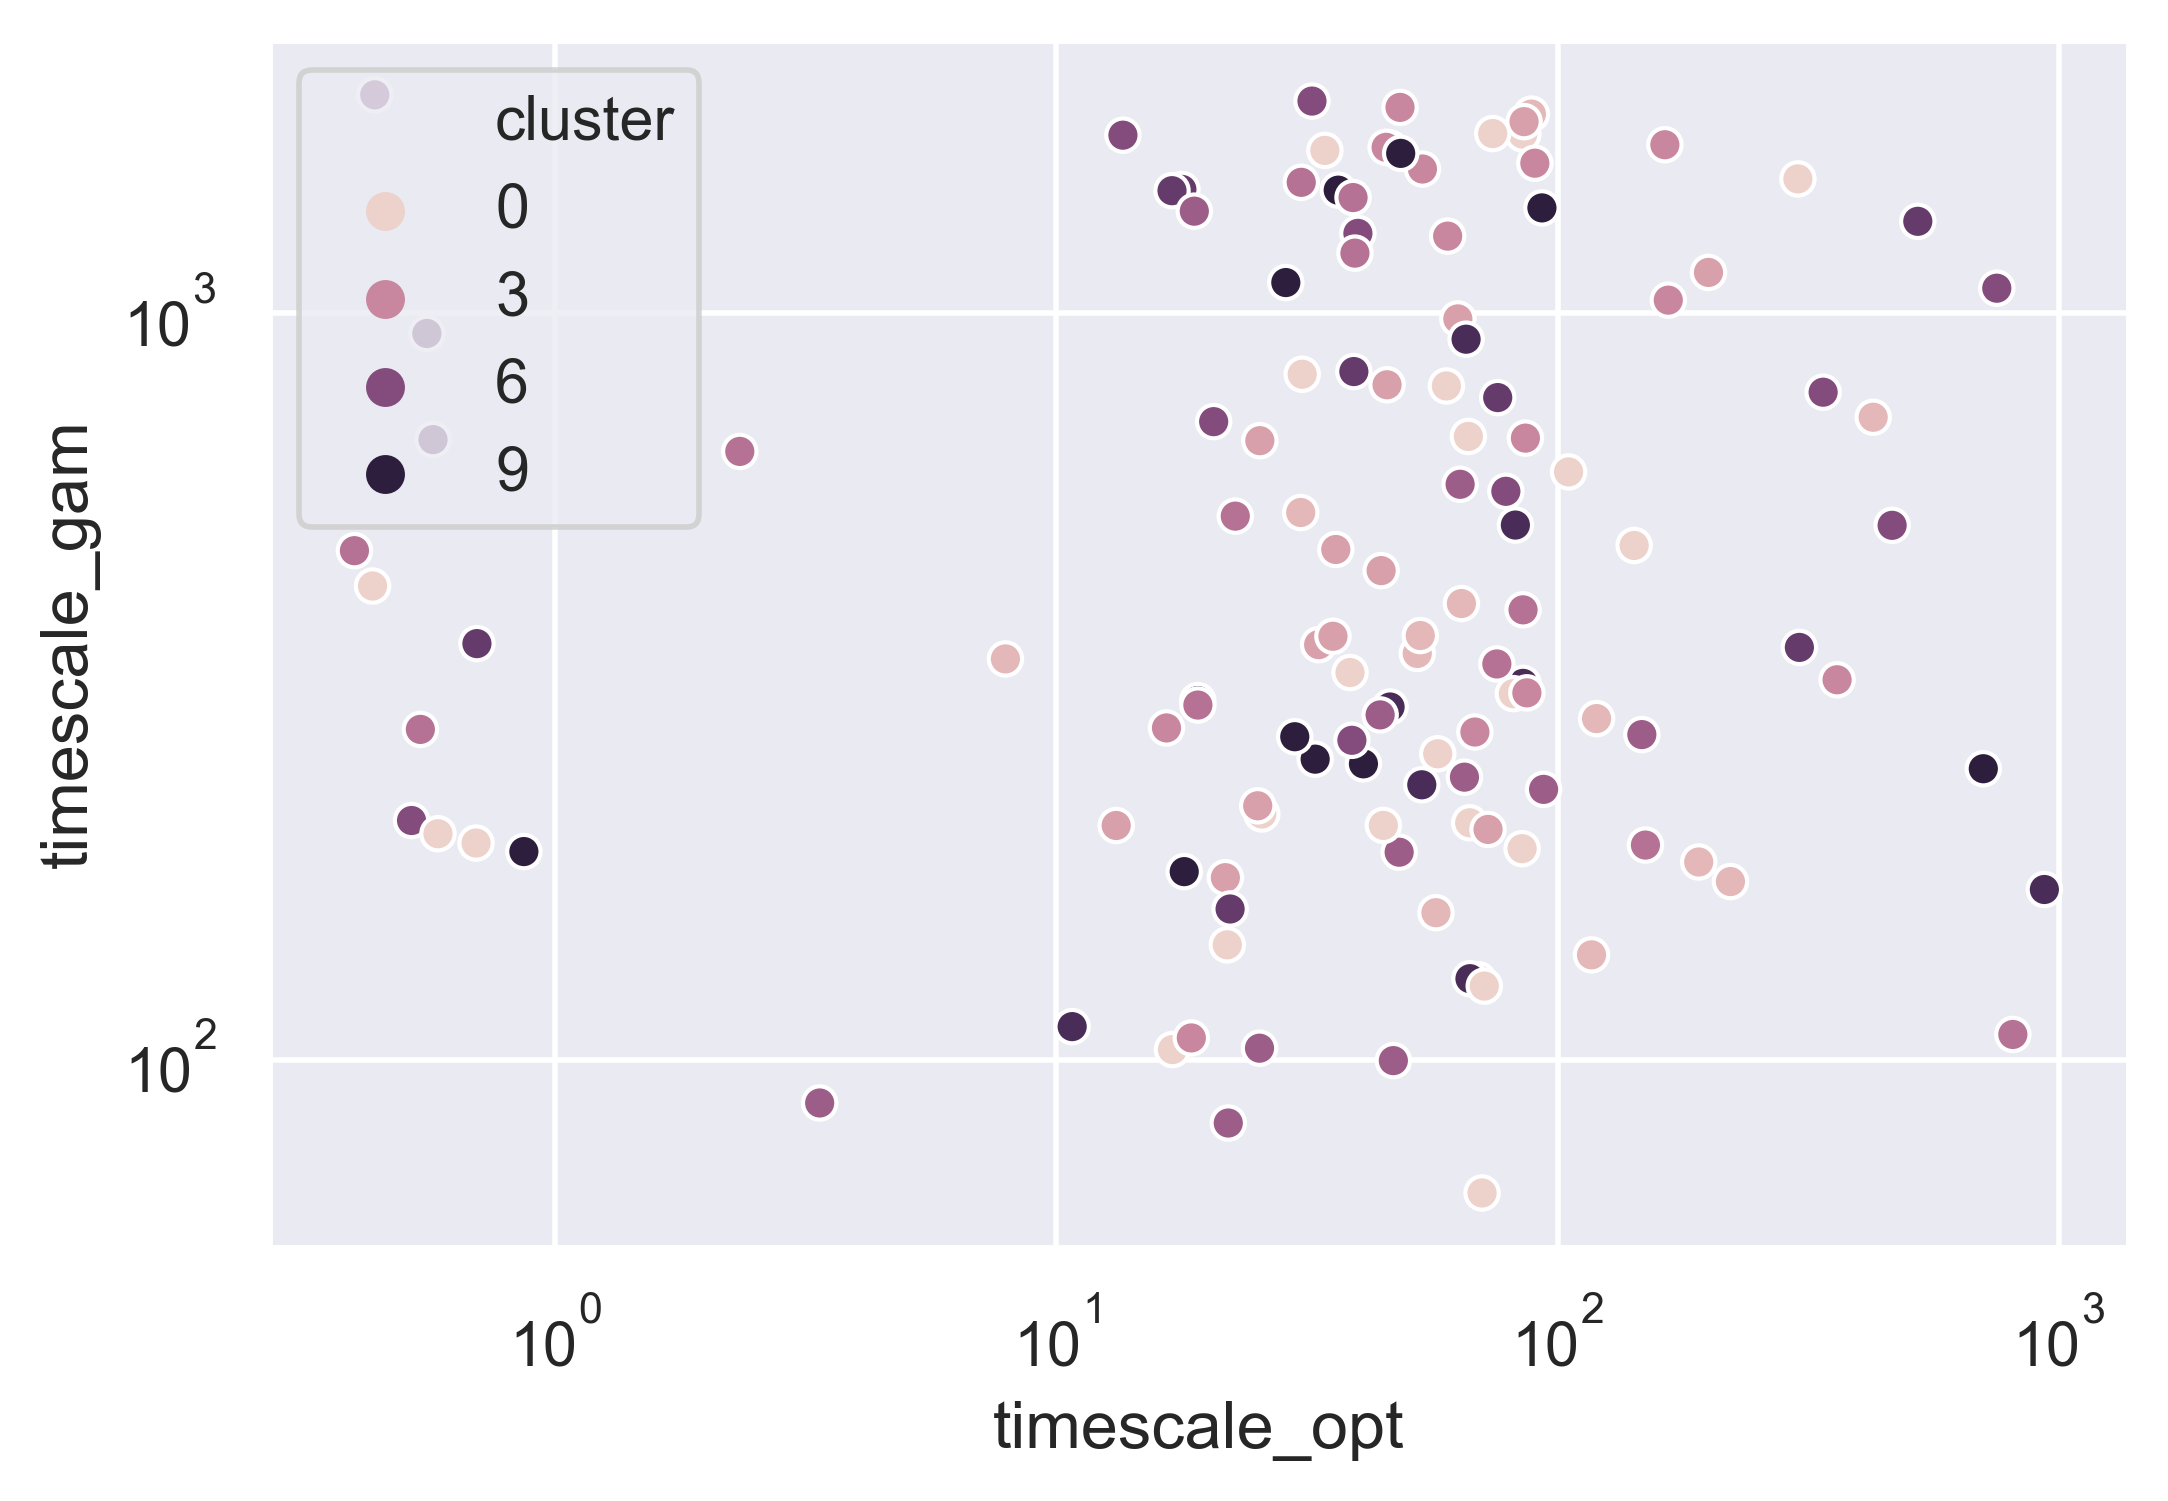

In [153]:
plt.figure(dpi=400)
sns.scatterplot(x='timescale_opt', y='timescale_gam', data=data_in, hue='cluster')
plt.xscale('log')
plt.yscale('log')
plt.show()


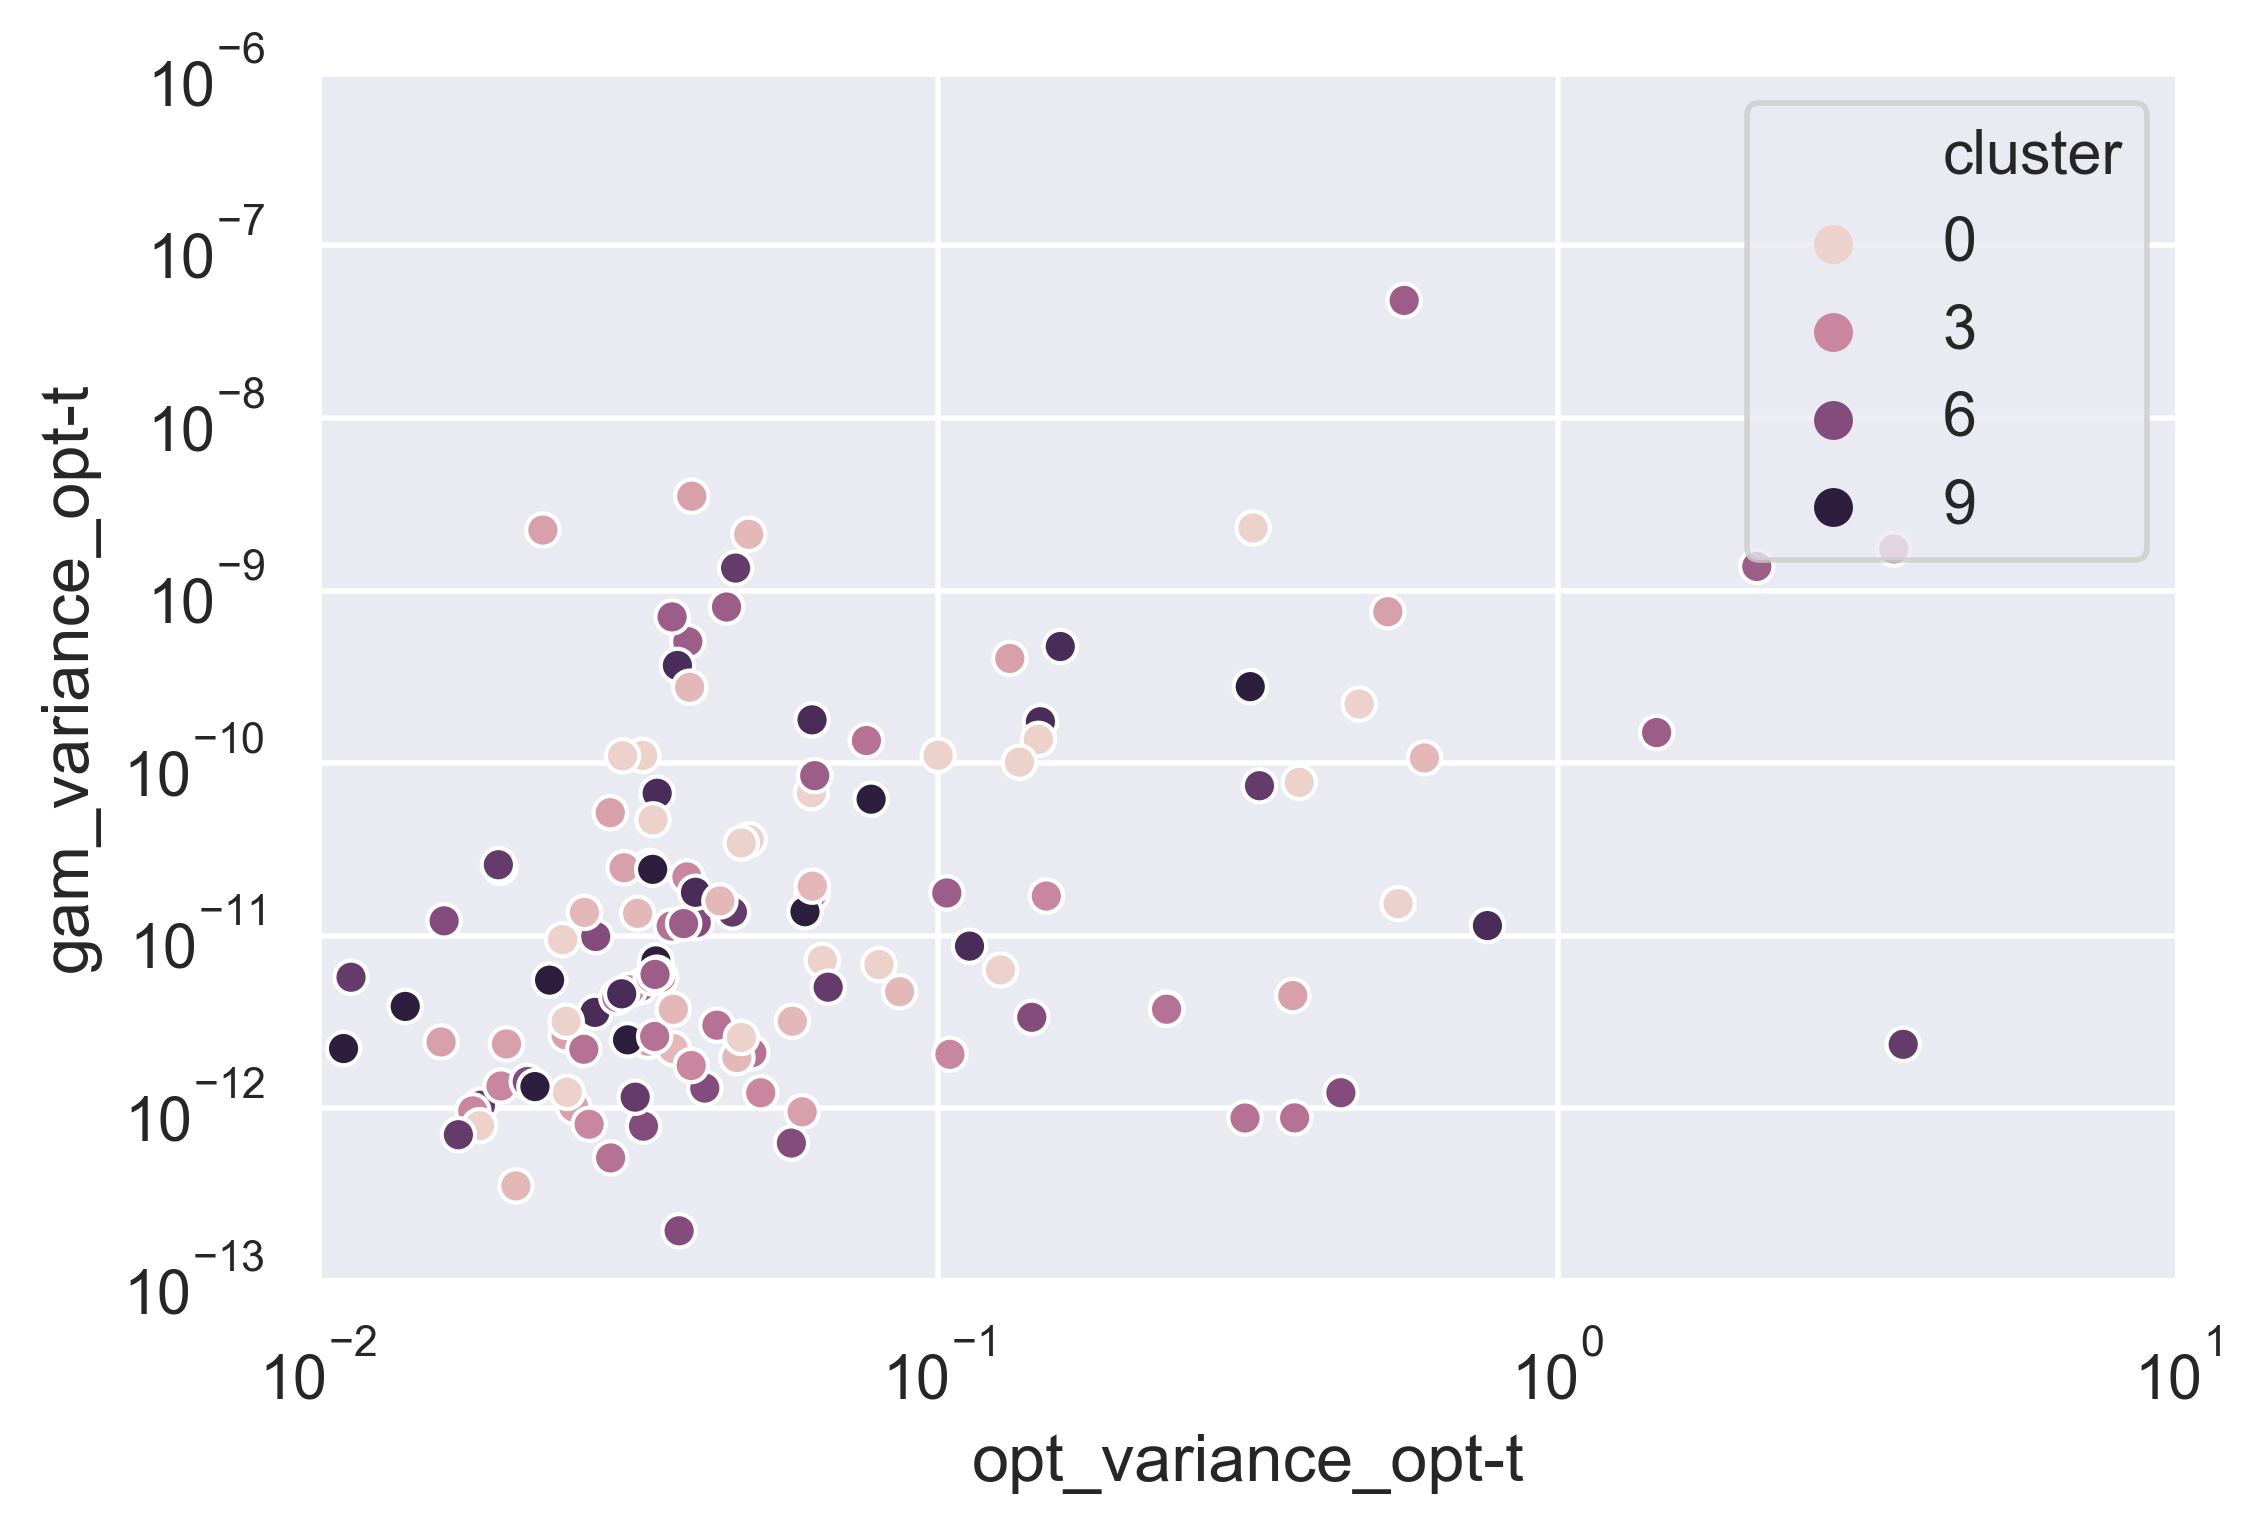

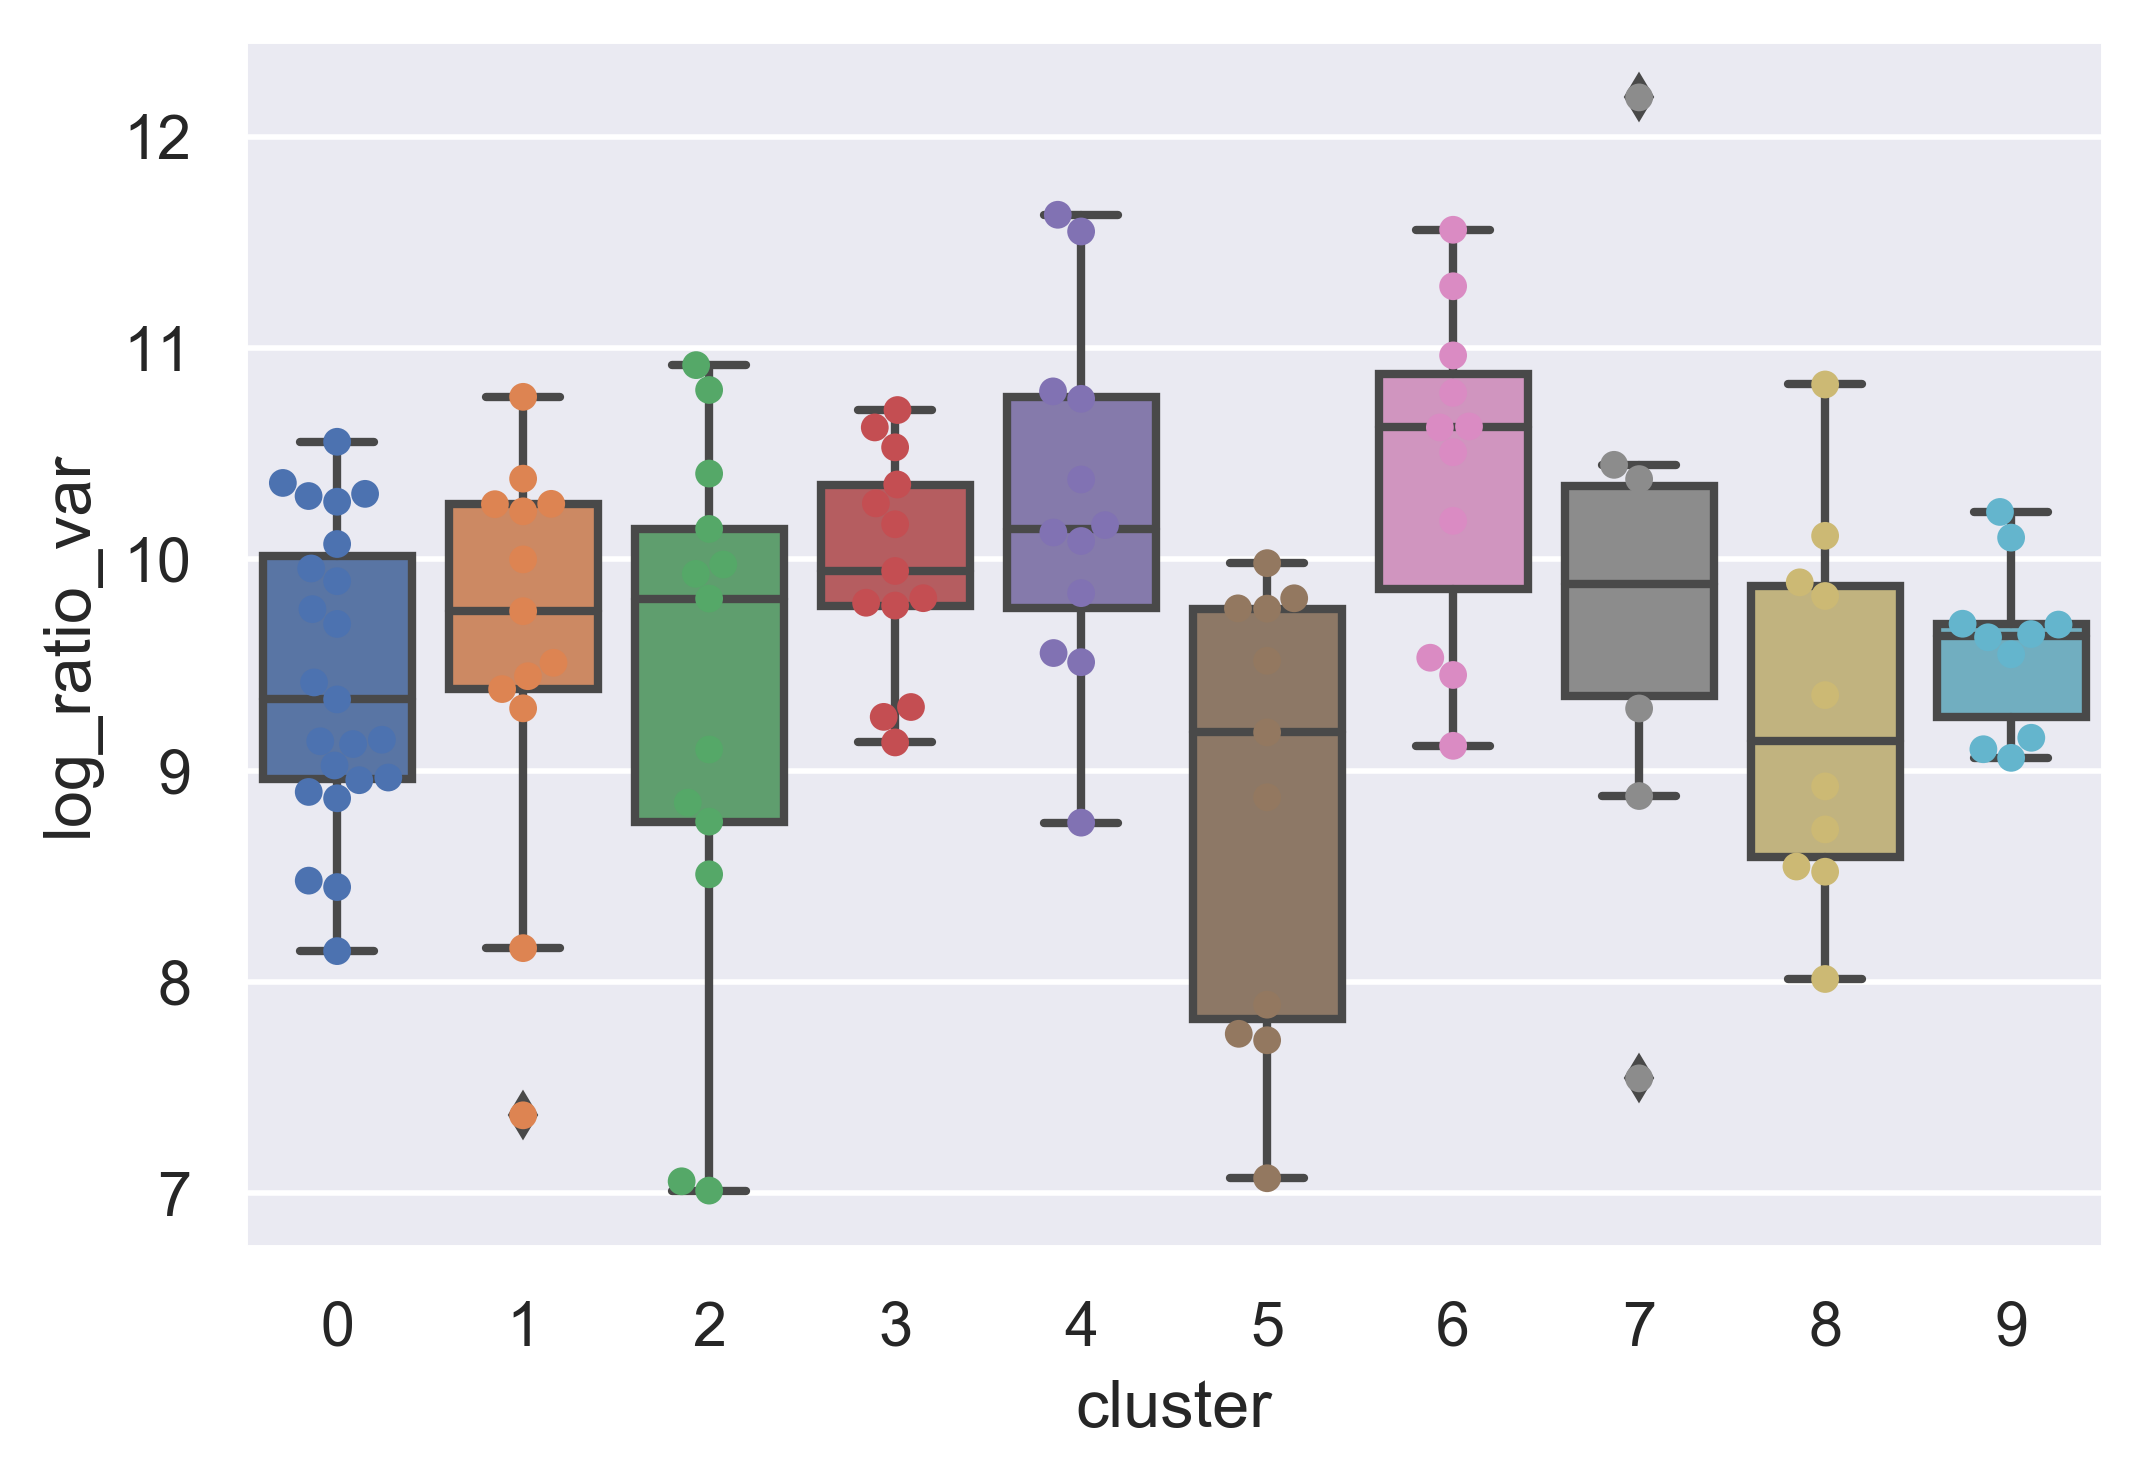

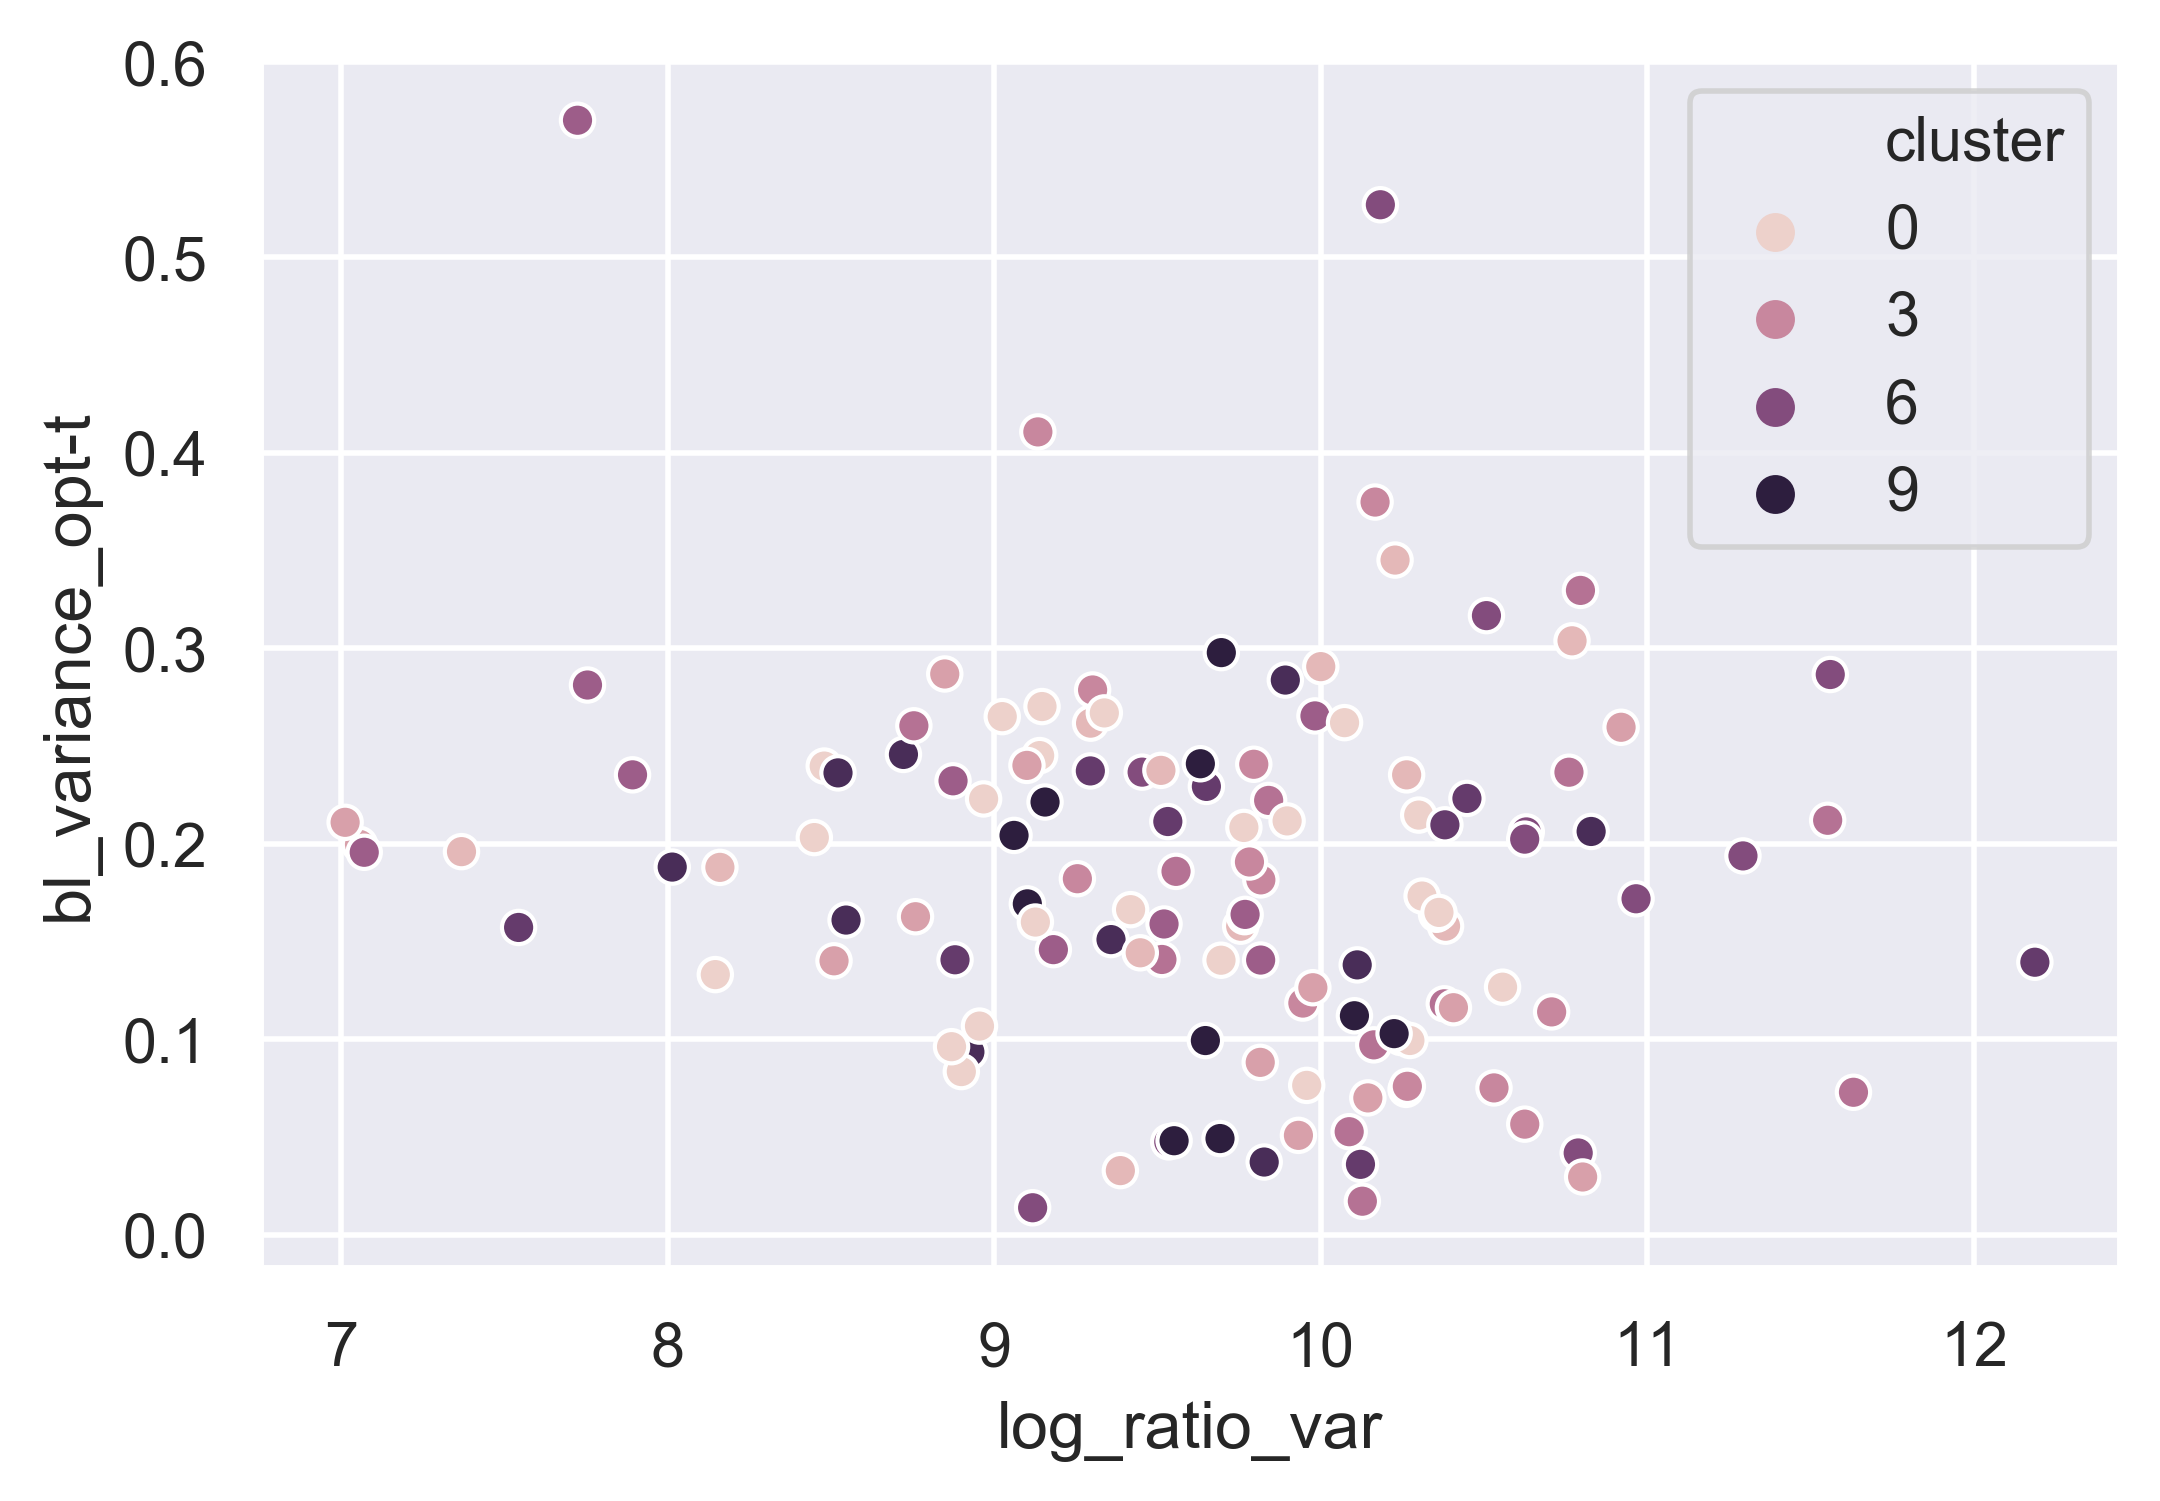

In [154]:
plt.figure(dpi=400)
sns.scatterplot(x='opt_variance_opt-t', y='gam_variance_opt-t', data=data_in, hue='cluster')
plt.xscale('log')
plt.xlim([1.e-2, 1.e1])
plt.yscale('log')
plt.ylim([1.e-13, 1.e-6])
plt.show()

df = data_in[['cluster', 'opt_variance_opt-t', 'gam_variance_opt-t', 'bl_variance_opt-t']].copy()
df['log_opt_variance_opt-t'] = np.log10(df['opt_variance_opt-t'])
df['log_gam_variance_opt-t'] = np.log10(df['gam_variance_opt-t'])
df['log_ratio_var'] = df['log_opt_variance_opt-t'] - df['log_gam_variance_opt-t']

plt.figure(dpi=400)
sns.boxplot(x='cluster', y='log_ratio_var', data=df)
sns.swarmplot(x='cluster', y='log_ratio_var', data=df)
plt.show()

plt.figure(dpi=400)
sns.scatterplot(x='log_ratio_var', y='bl_variance_opt-t', data=df, hue='cluster')
plt.show()

In [155]:
Mpc2cm = 1.e3*3.15e21
MeV2erg = 1/6.24e5
data_in['lum_E'] = data_in['gam_flux_total_ba']*4.*np.pi*data_in['lum_distance']**2*Mpc2cm**2*MeV2erg
data_in['log_lum_E'] = np.log10(data_in['lum_E'])

C:\Users\psyko\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


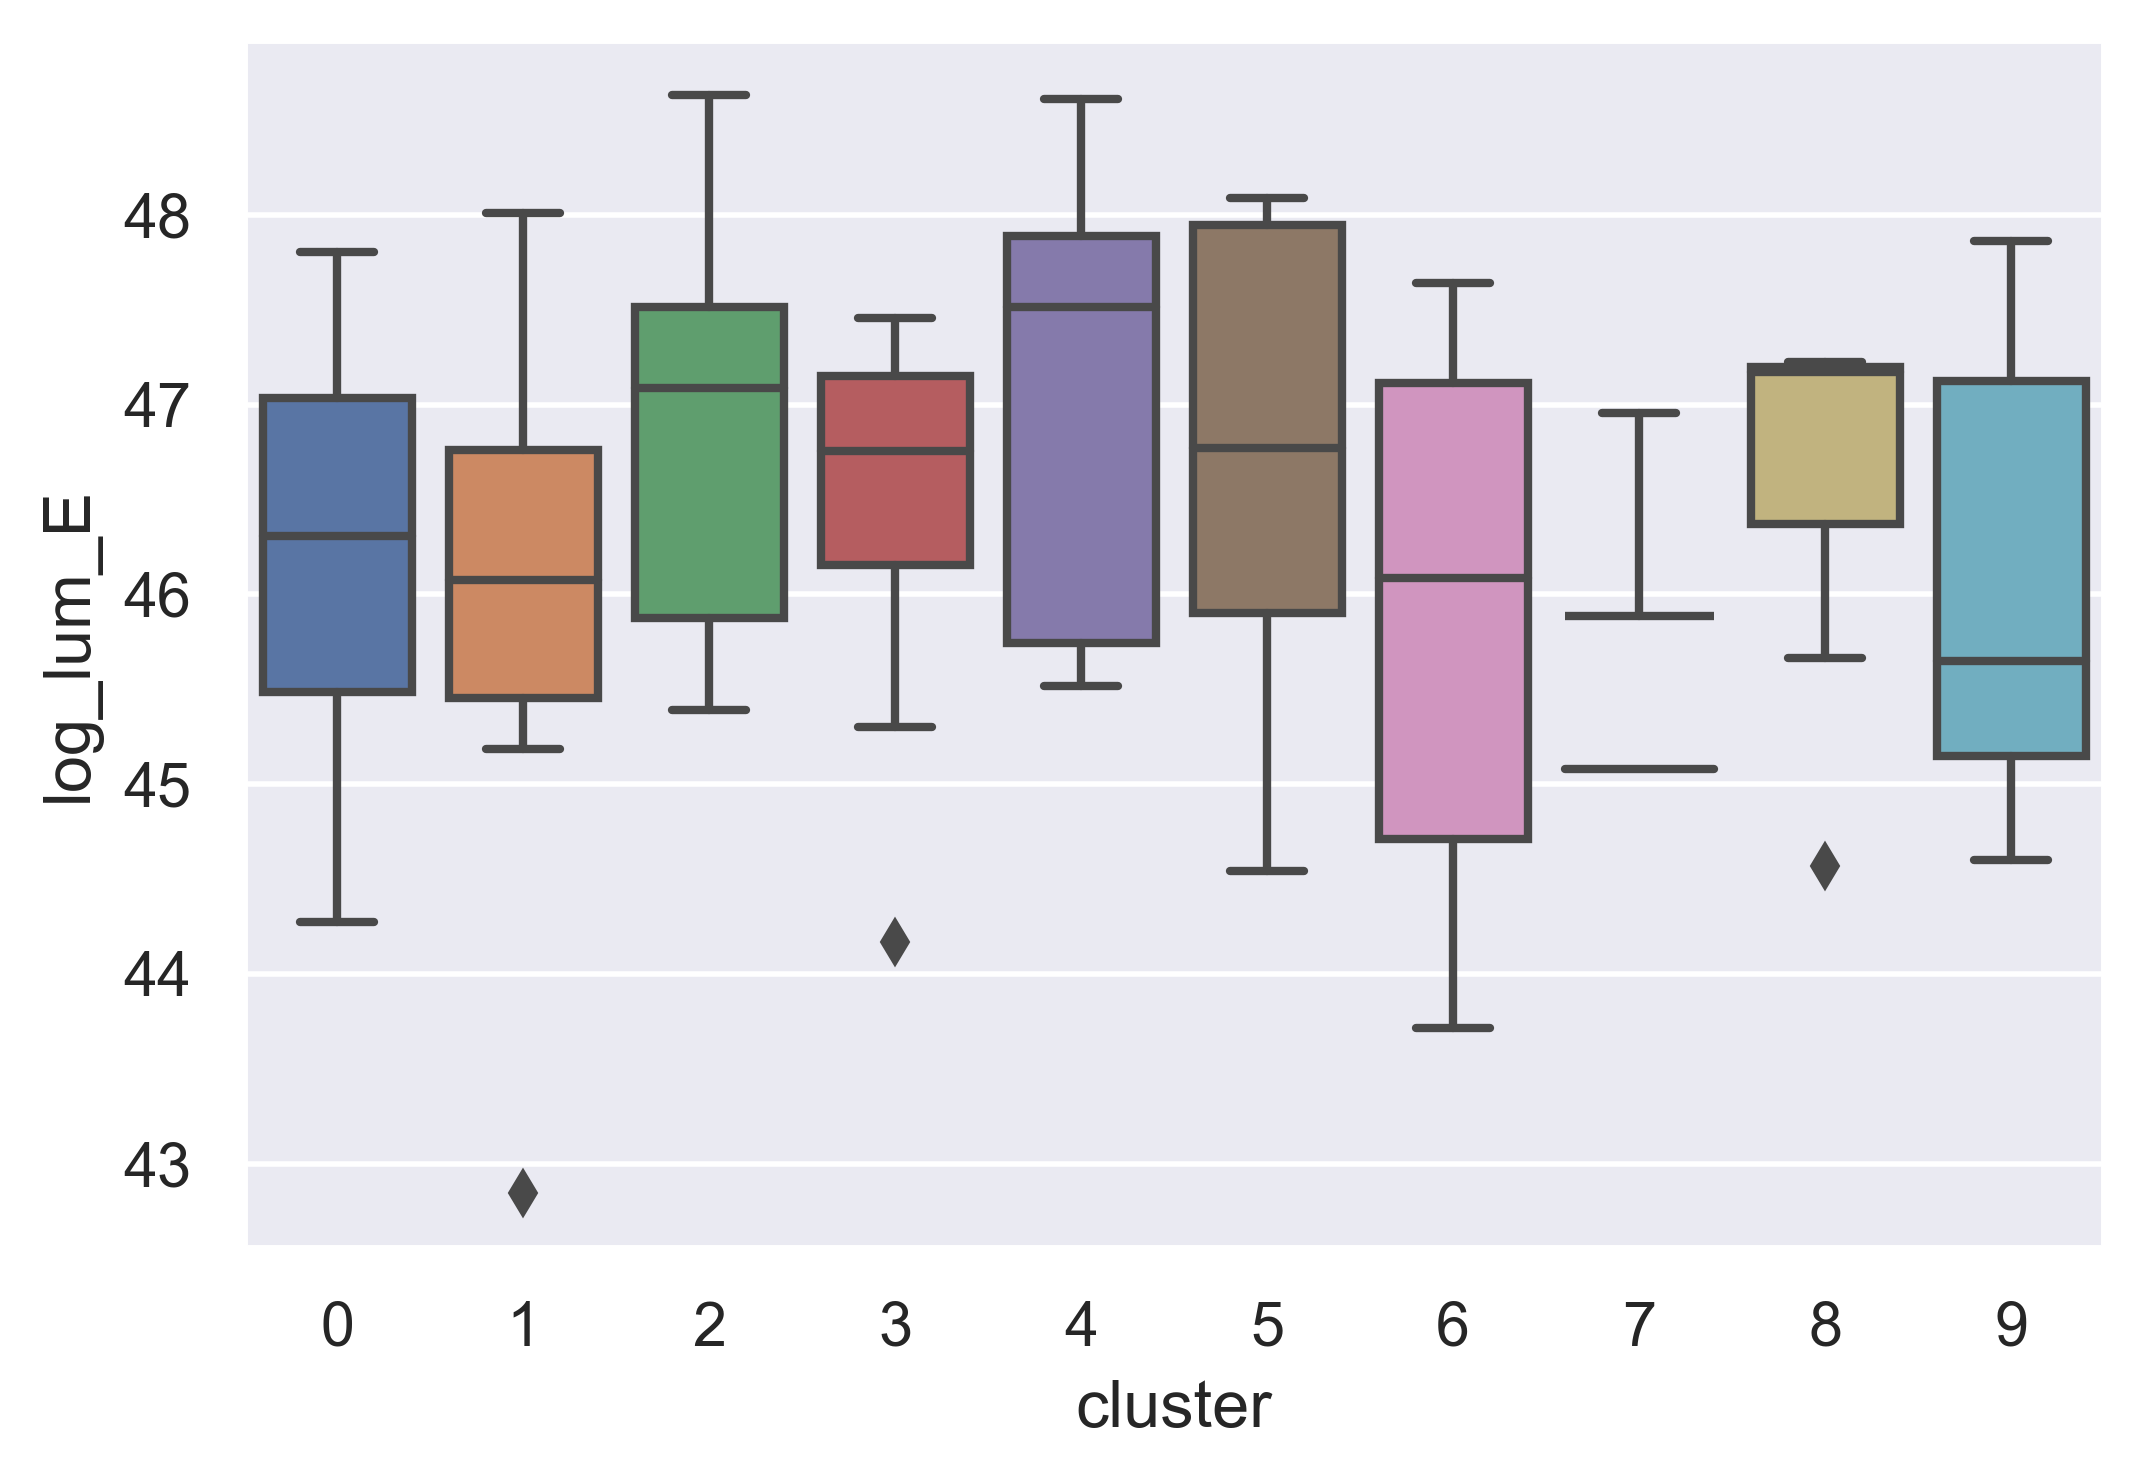

In [156]:
plt.figure(dpi=400)
sns.boxplot(x='cluster', y='log_lum_E', data=data_in)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='log_lum_E', data=data_in)
plt.show()

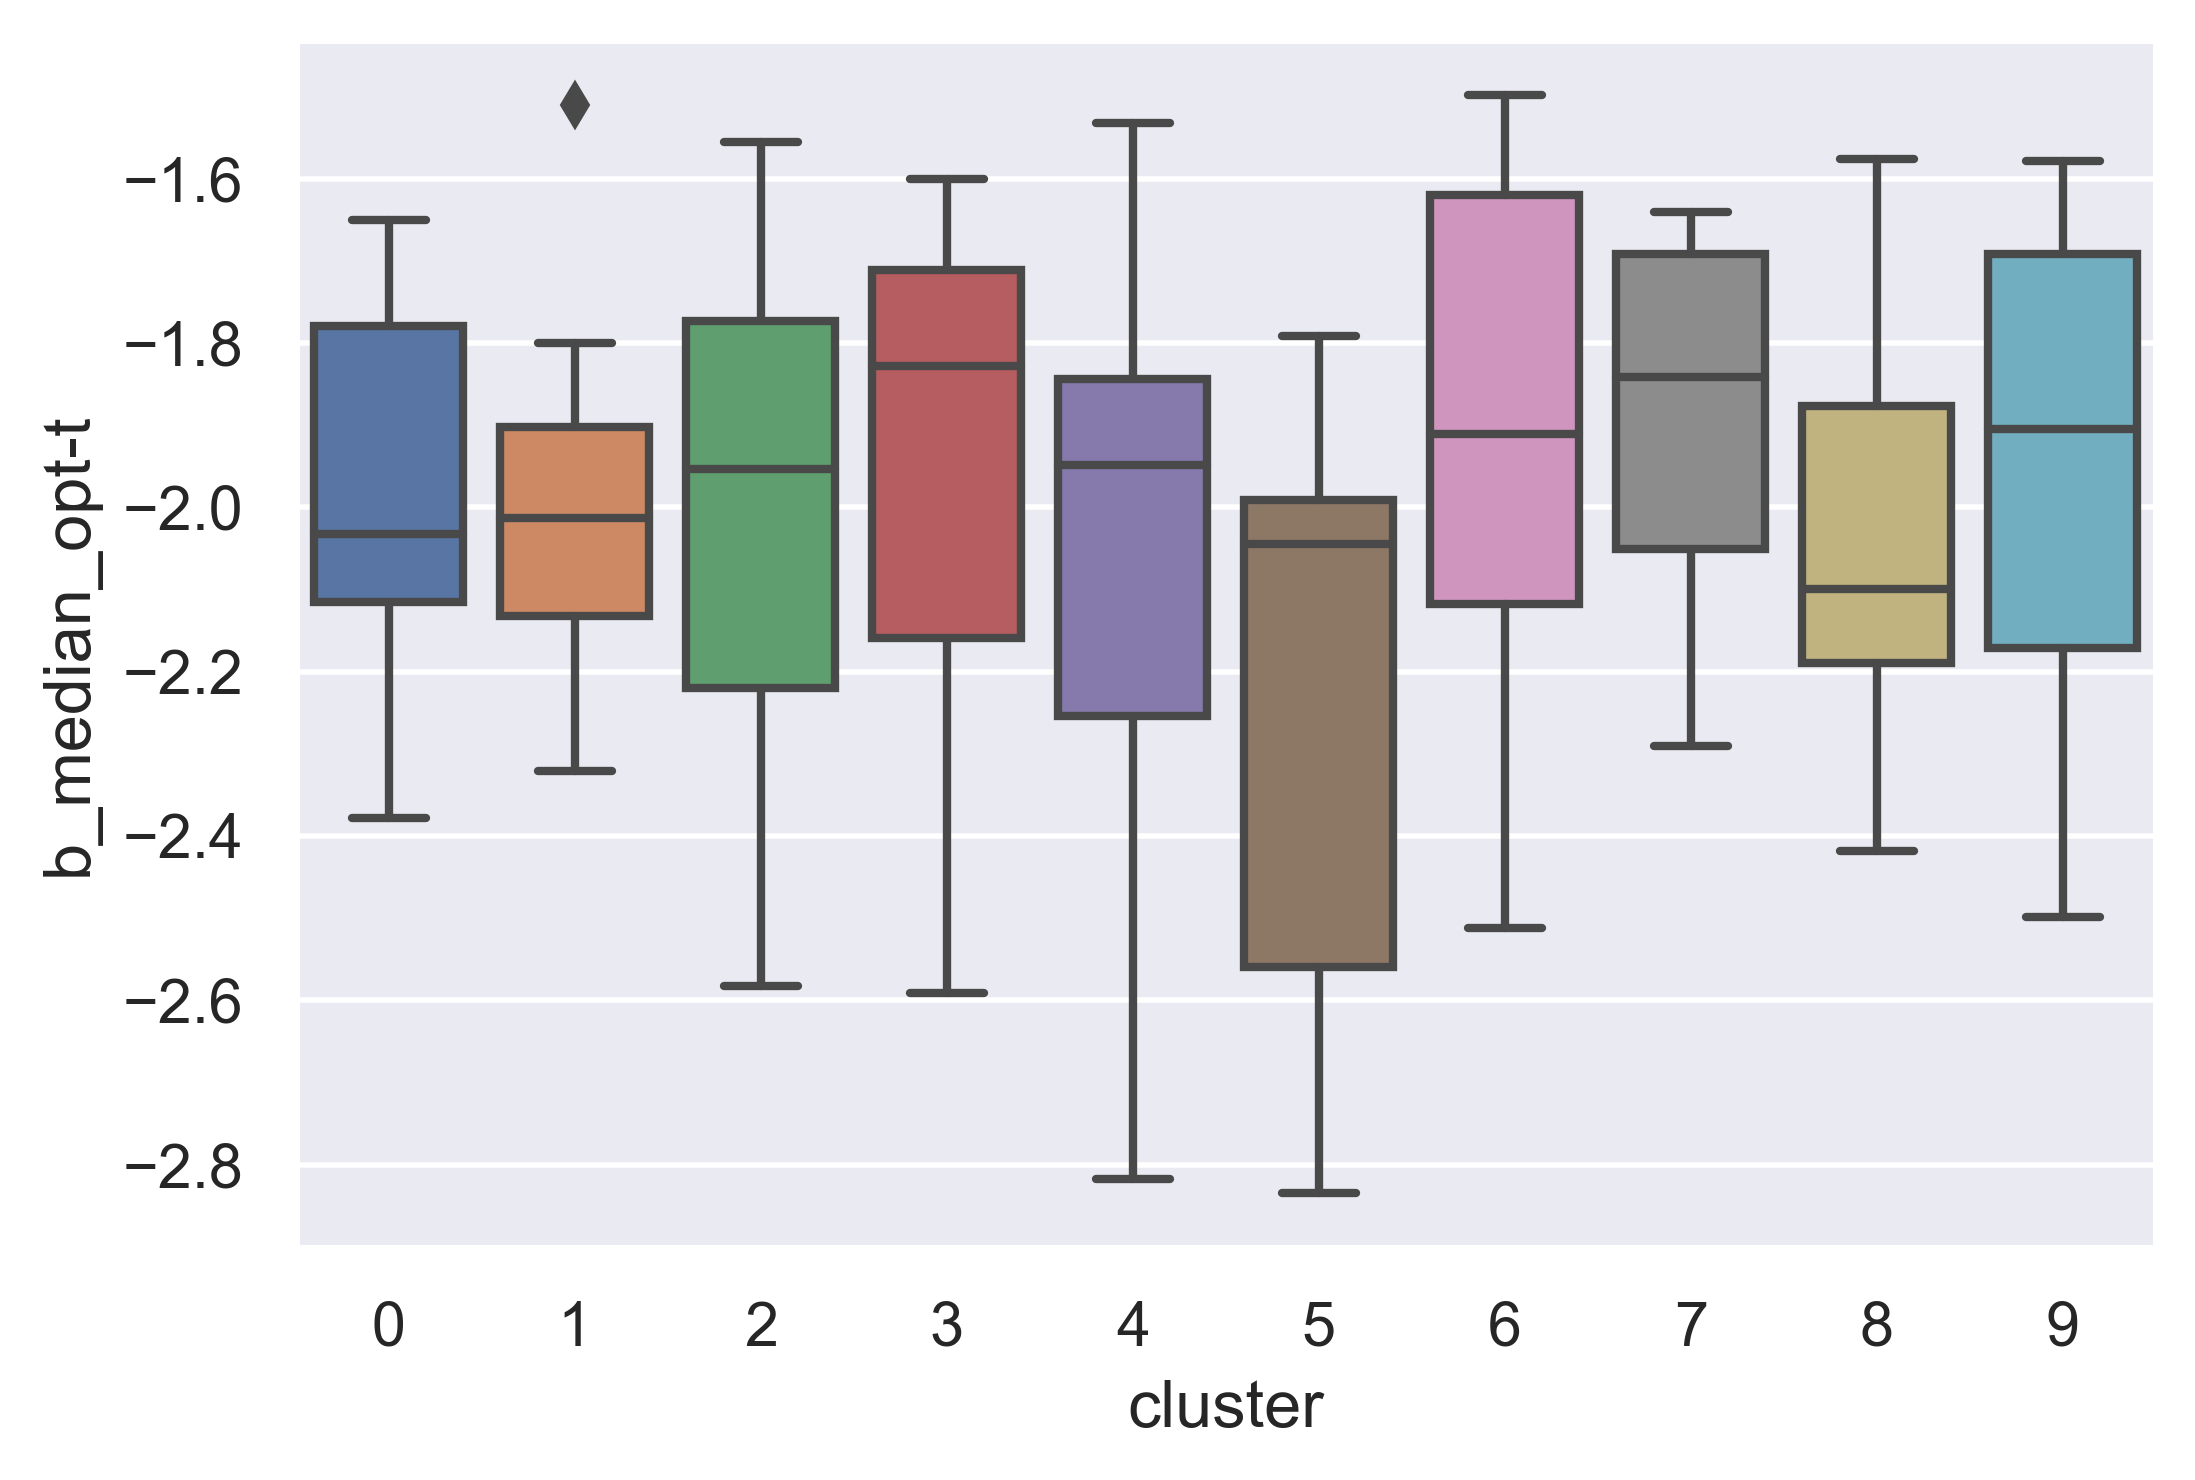

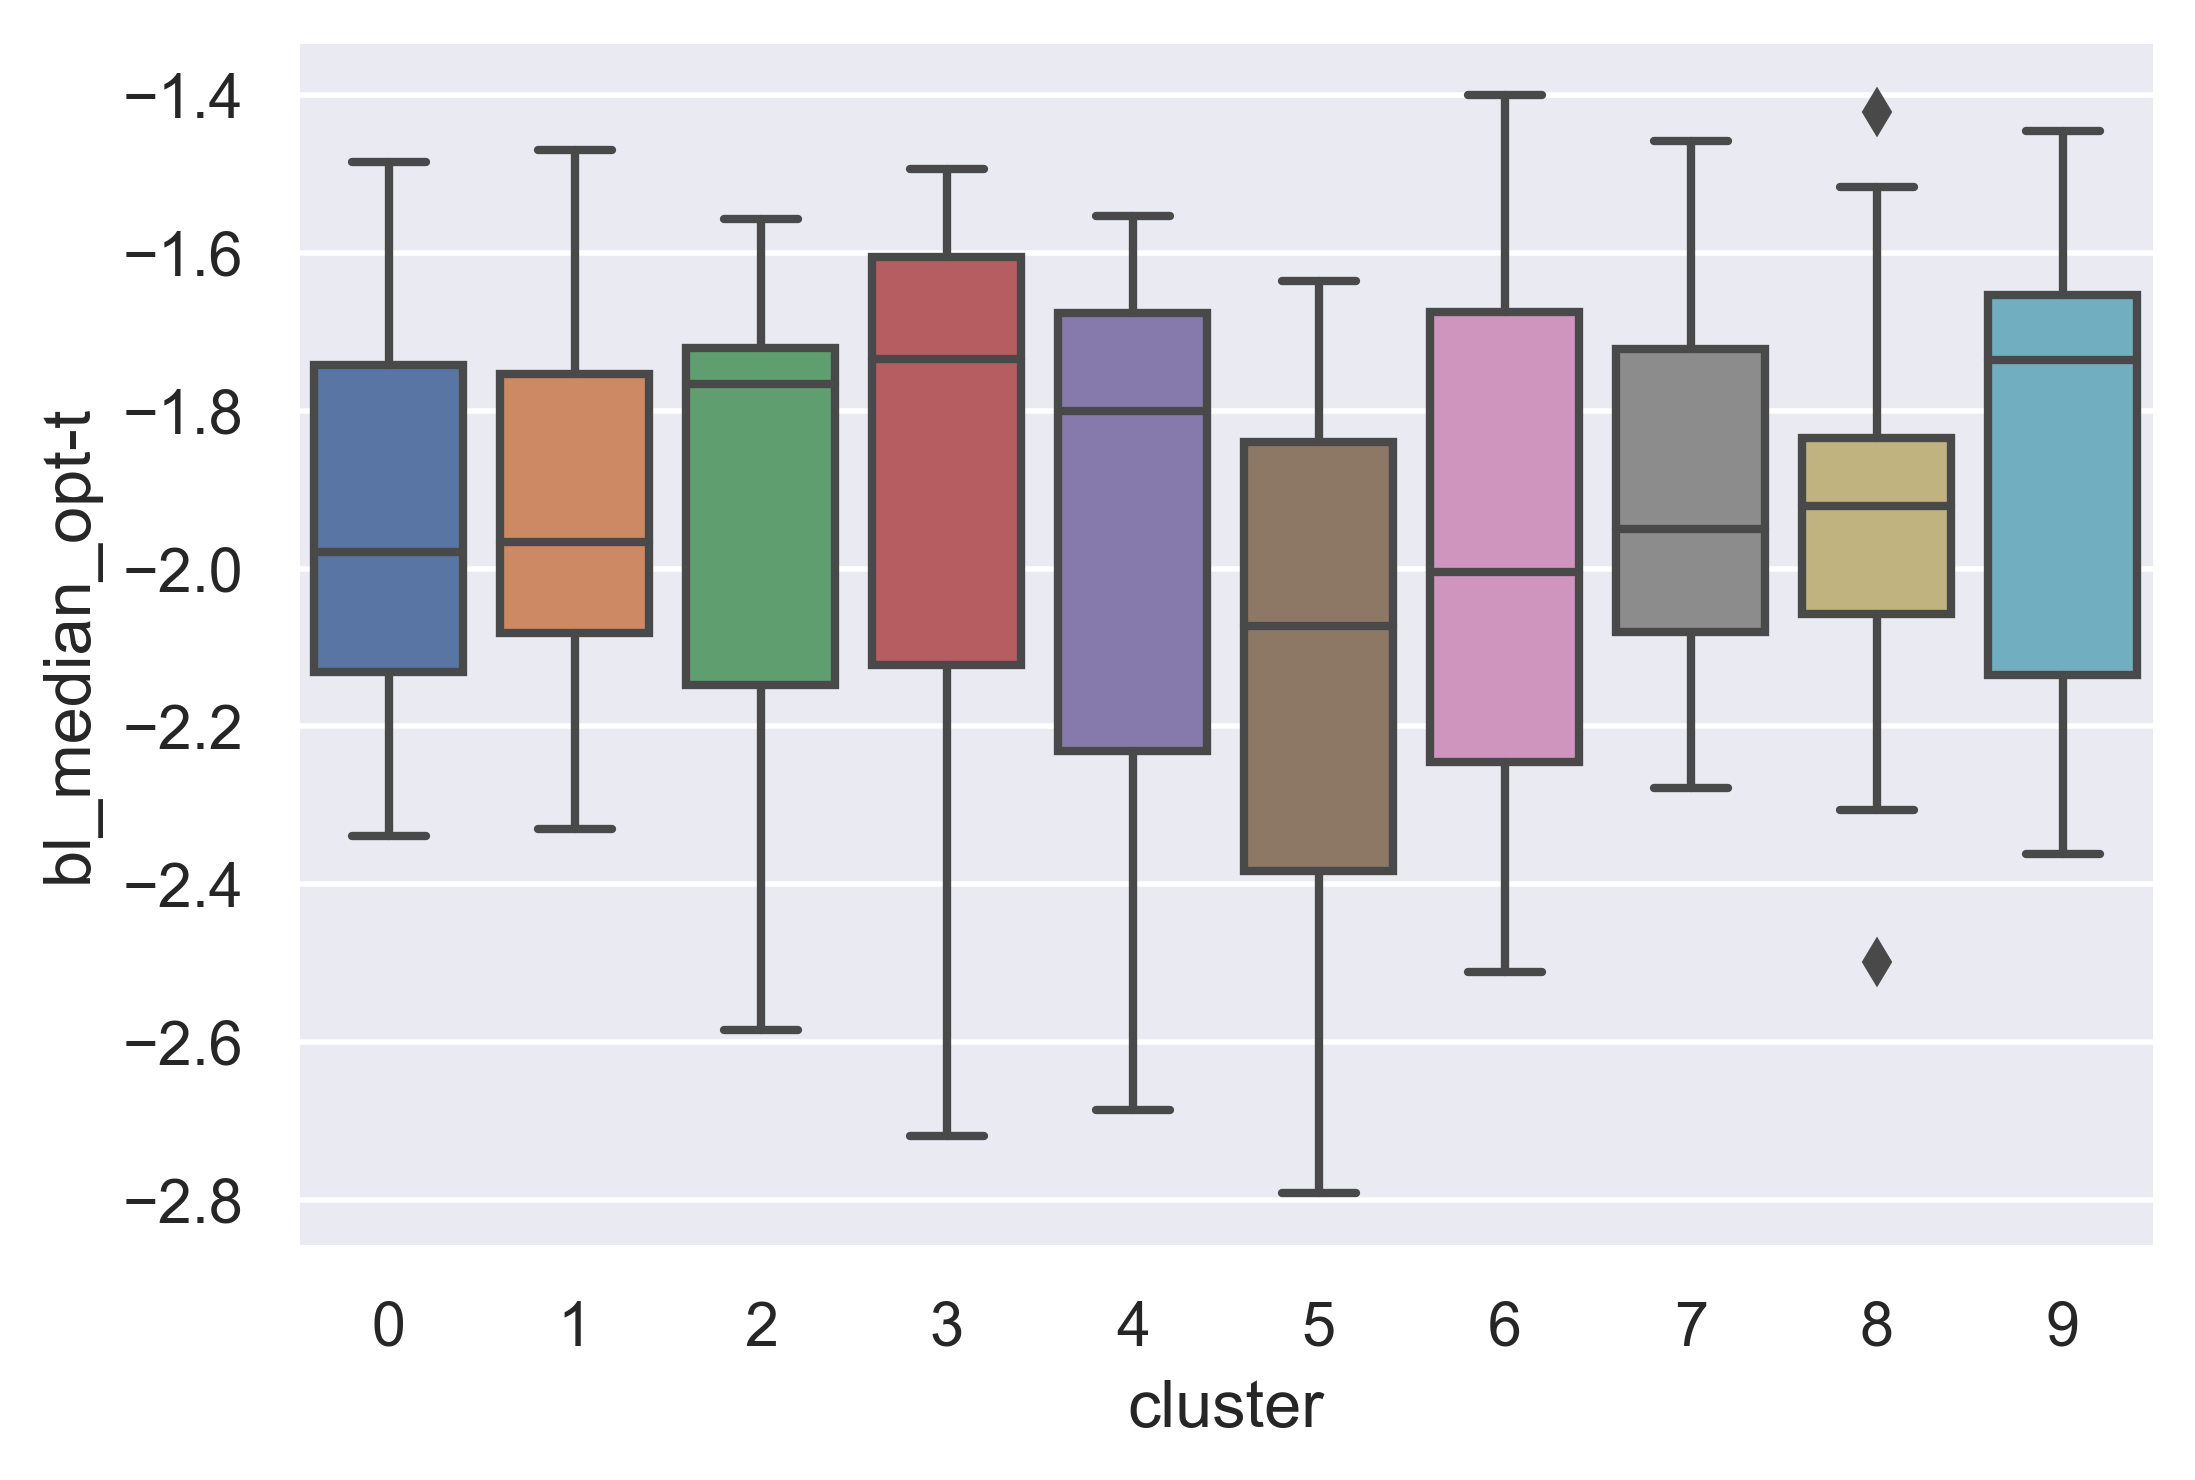

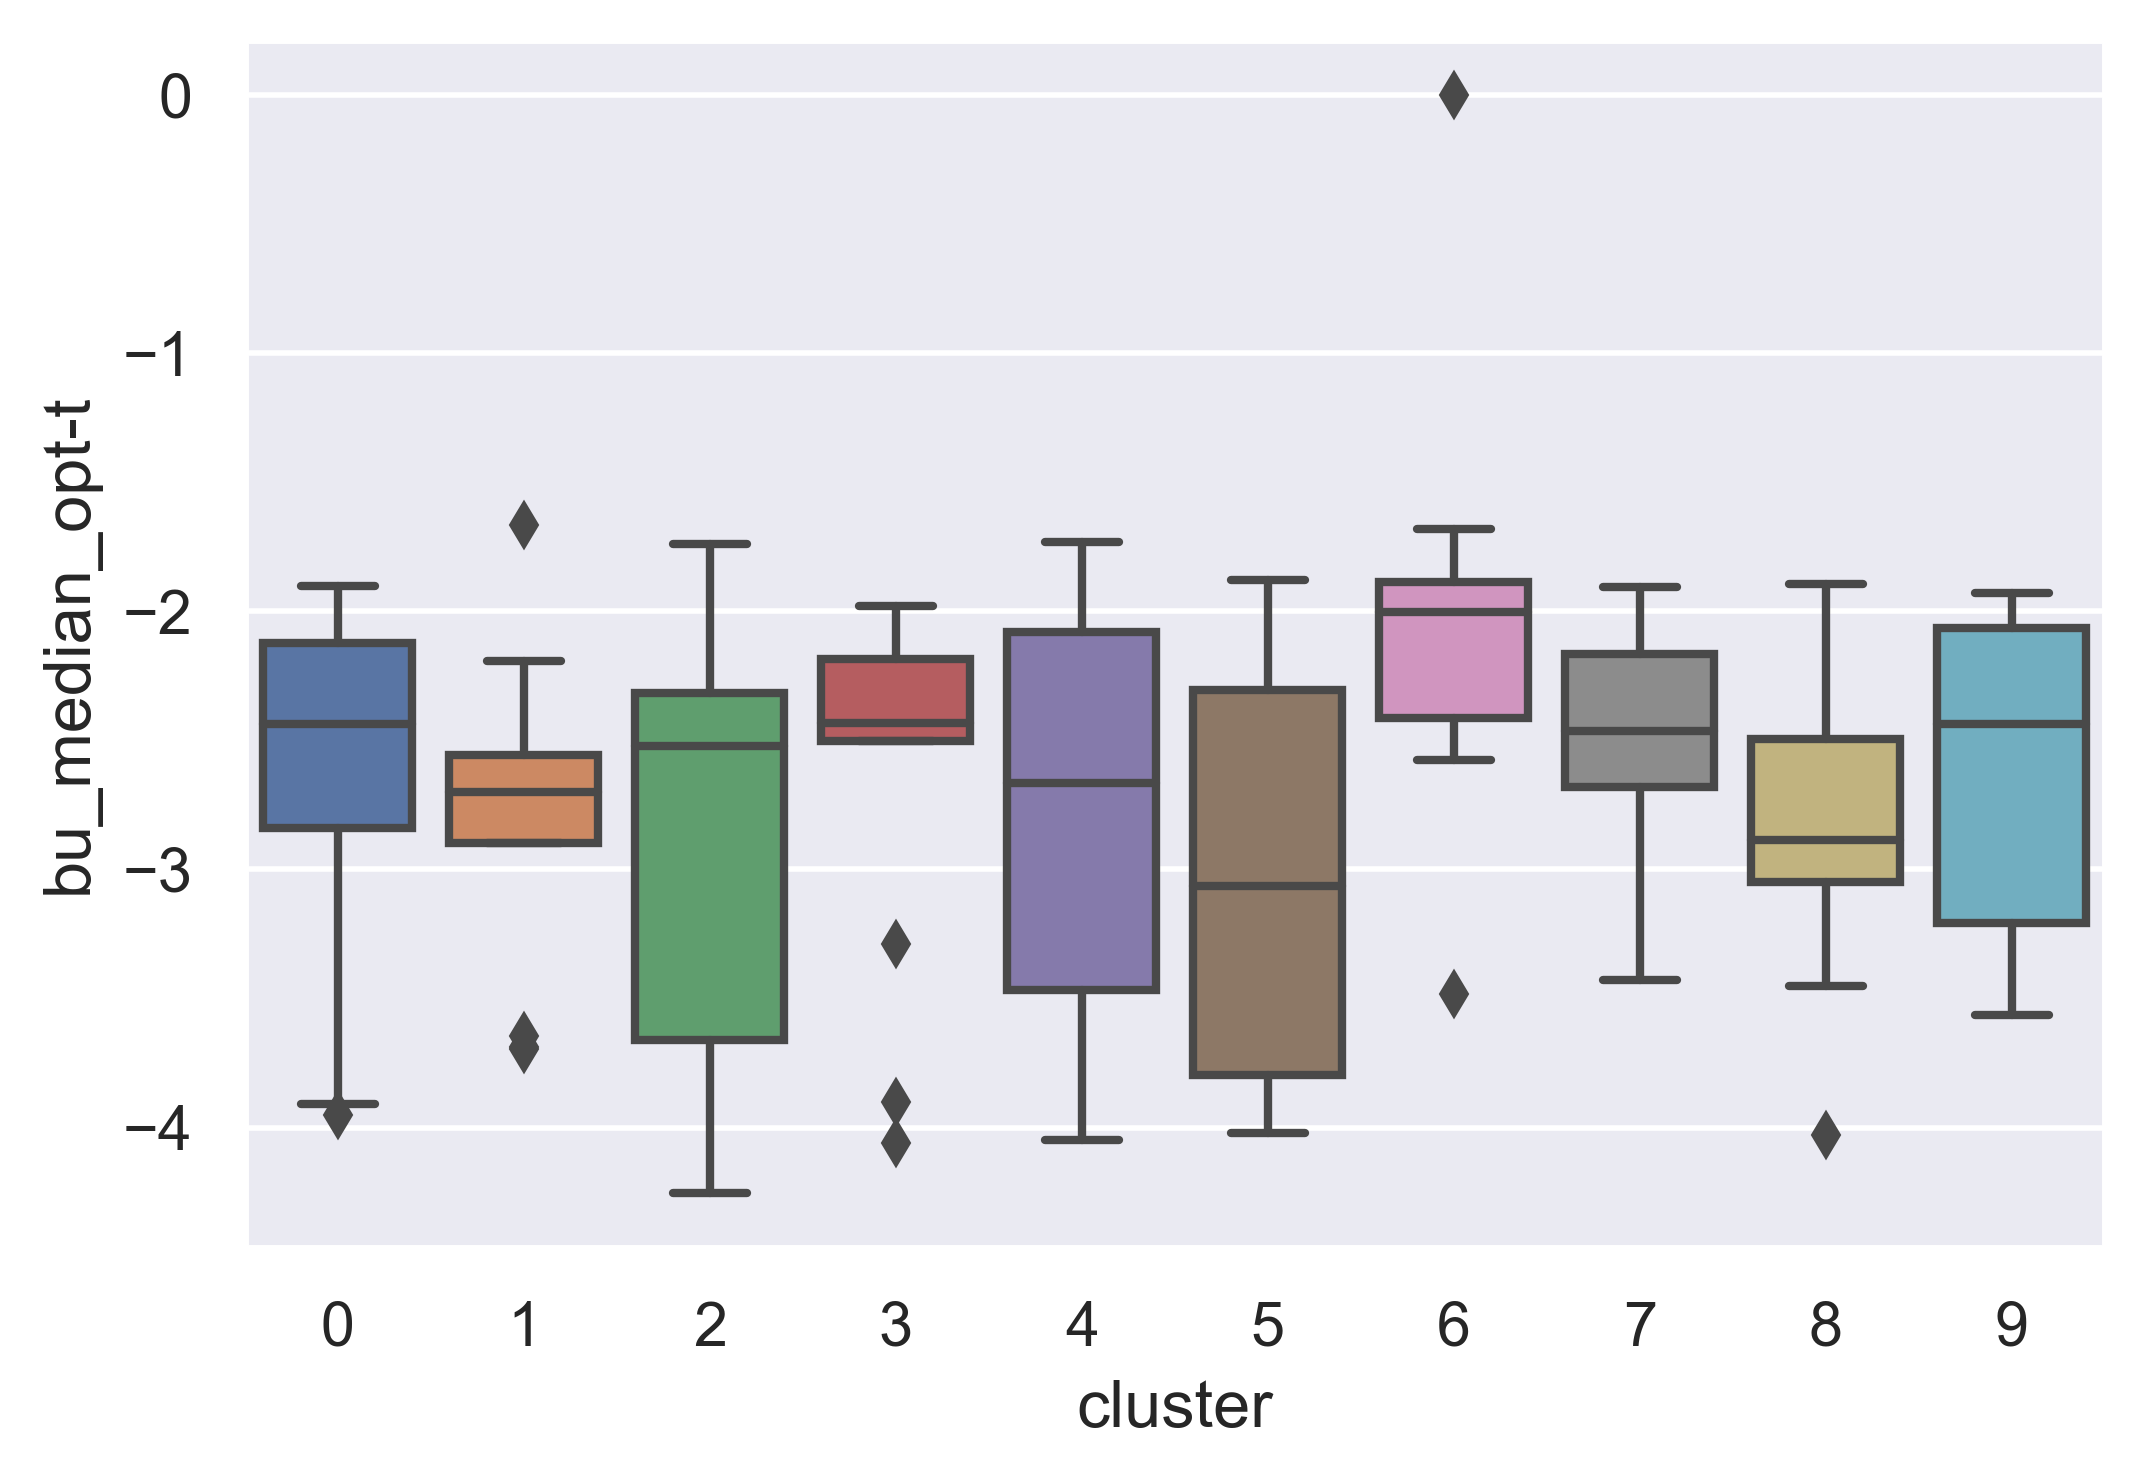

In [157]:
plt.figure(dpi=400)
sns.boxplot(x='cluster', y='b_median_opt-t', data=data_in)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='b_median_opt-t', data=data_in)
plt.show()

plt.figure(dpi=400)
sns.boxplot(x='cluster', y='bl_median_opt-t', data=data_in)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='bl_median_opt-t', data=data_in)
plt.show()

plt.figure(dpi=400)
sns.boxplot(x='cluster', y='bu_median_opt-t', data=data_in)#, hue='SOURCE_TYPE')
# sns.swarmplot(x='cluster', y='bu_median_opt-t', data=data_in)
plt.show()